<a href="https://colab.research.google.com/github/zoraizmohammad/LifeEdit/blob/main/LifeEdit_EDA_SJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
raw_df1 = pd.read_csv("/content/GSE218462_raw_counts_GRCh38.p13_NCBI.tsv", sep = '\t')

In [ ]:
raw_df1

,GeneID,GSM6745599,GSM6745600,GSM6745601,GSM6745602,GSM6745603,GSM6745604,GSM6745605,GSM6745606,GSM6745607,...,GSM6745628,GSM6745629,GSM6745630,GSM6745631,GSM6745632,GSM6745633,GSM6745634,GSM6745635,GSM6745636,GSM6745637
0,100287102,22,12,28,23,25,20,25,16,24,...,23,17,14,17,26,32,14,24,32,28
1,653635,211,123,334,211,243,281,281,143,245,...,289,214,160,279,246,275,179,203,245,226
2,102466751,3,0,4,2,3,6,1,2,6,...,2,3,3,5,4,2,5,2,4,5
3,107985730,2,1,1,2,3,2,1,0,3,...,2,2,0,2,1,1,1,1,2,1
4,100302278,1,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,4236,3074,7594,6209,6113,7364,4842,3128,5136,...,2727,2779,1899,5550,6694,6645,2262,2990,5252,4305
39372,4556,269,213,459,361,406,496,346,204,309,...,89,112,97,334,415,227,63,158,311,240
39373,4519,18928,14177,30965,25035,25410,28746,18416,13381,21677,...,25261,21399,13606,28620,31561,48604,19777,17037,25027,22450
39374,4576,134,87,228,152,156,214,130,92,124,...,180,114,78,179,219,337,108,98,128,147


In [ ]:
genes = raw_df1["GeneID"]
samples = raw_df1.columns

In [ ]:
samples

Index(['GeneID', 'GSM6745599', 'GSM6745600', 'GSM6745601', 'GSM6745602',
       'GSM6745603', 'GSM6745604', 'GSM6745605', 'GSM6745606', 'GSM6745607',
       'GSM6745609', 'GSM6745610', 'GSM6745611', 'GSM6745612', 'GSM6745613',
       'GSM6745614', 'GSM6745615', 'GSM6745616', 'GSM6745617', 'GSM6745618',
       'GSM6745619', 'GSM6745620', 'GSM6745621', 'GSM6745622', 'GSM6745623',
       'GSM6745624', 'GSM6745625', 'GSM6745626', 'GSM6745627', 'GSM6745628',
       'GSM6745629', 'GSM6745630', 'GSM6745631', 'GSM6745632', 'GSM6745633',
       'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637'],
      dtype='object')

In [ ]:
raw_df1_T = raw_df1.T
raw_df1_T

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,22,211,3,2,1,0,0,33,64,25,...,25802,21,15,8,14544,4236,269,18928,134,194
GSM6745600,12,123,0,1,1,0,0,19,56,12,...,16362,17,17,11,10924,3074,213,14177,87,188
GSM6745601,28,334,4,1,0,0,0,51,95,31,...,38224,32,24,14,24383,7594,459,30965,228,374
GSM6745602,23,211,2,2,0,0,0,44,71,27,...,31670,28,19,16,19763,6209,361,25035,152,243
GSM6745603,25,243,3,3,0,0,0,36,58,32,...,33866,35,23,10,18650,6113,406,25410,156,274
GSM6745604,20,281,6,2,0,0,0,40,77,24,...,40186,37,27,7,22464,7364,496,28746,214,315
GSM6745605,25,281,1,1,0,0,0,32,61,27,...,27199,40,33,8,14375,4842,346,18416,130,293
GSM6745606,16,143,2,0,1,1,0,19,45,16,...,18906,15,11,6,10908,3128,204,13381,92,152
GSM6745607,24,245,6,3,0,0,0,34,61,29,...,29229,22,16,7,16875,5136,309,21677,124,214


In [ ]:
raw_df1_T.columns = raw_df1_T.iloc[0]
raw_df1_T = raw_df1_T[1:]

In [ ]:
raw_df1_T

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,22,211,3,2,1,0,0,33,64,25,...,25802,21,15,8,14544,4236,269,18928,134,194
GSM6745600,12,123,0,1,1,0,0,19,56,12,...,16362,17,17,11,10924,3074,213,14177,87,188
GSM6745601,28,334,4,1,0,0,0,51,95,31,...,38224,32,24,14,24383,7594,459,30965,228,374
GSM6745602,23,211,2,2,0,0,0,44,71,27,...,31670,28,19,16,19763,6209,361,25035,152,243
GSM6745603,25,243,3,3,0,0,0,36,58,32,...,33866,35,23,10,18650,6113,406,25410,156,274
GSM6745604,20,281,6,2,0,0,0,40,77,24,...,40186,37,27,7,22464,7364,496,28746,214,315
GSM6745605,25,281,1,1,0,0,0,32,61,27,...,27199,40,33,8,14375,4842,346,18416,130,293
GSM6745606,16,143,2,0,1,1,0,19,45,16,...,18906,15,11,6,10908,3128,204,13381,92,152
GSM6745607,24,245,6,3,0,0,0,34,61,29,...,29229,22,16,7,16875,5136,309,21677,124,214
GSM6745609,20,175,1,1,0,0,0,22,38,26,...,25079,9,7,4,15199,3913,141,16099,81,148


In [ ]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(raw_df1_T)

In [ ]:
scaled_df1 = pd.DataFrame(scaled_data1)
scaled_df1

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
0,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.238021,-0.214857,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282
1,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.264922,-0.613129,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273
2,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.113269,0.880390,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436
3,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.400312,0.482118,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141
4,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.639197,1.179094,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593
5,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.326699,1.378230,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029
6,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,-0.086052,1.676933,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063
7,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.988181,-0.812265,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216
8,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.134775,-0.115289,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313
9,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.316670,-1.409672,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210


In [ ]:
scaled_df1.columns = raw_df1_T.columns
scaled_df1.index = raw_df1_T.index

In [ ]:
scaled_df1

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.238021,-0.214857,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.264922,-0.613129,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.113269,0.880390,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.400312,0.482118,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.639197,1.179094,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.326699,1.378230,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,-0.086052,1.676933,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.988181,-0.812265,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.134775,-0.115289,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.316670,-1.409672,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210


**EDA using scaled_df1**

In [ ]:
scaled_df1

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.238021,-0.214857,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.264922,-0.613129,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.113269,0.880390,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.400312,0.482118,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.639197,1.179094,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.326699,1.378230,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,-0.086052,1.676933,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.988181,-0.812265,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.134775,-0.115289,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.316670,-1.409672,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210


In [ ]:
scaled_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, GSM6745599 to GSM6745637
Columns: 39376 entries, 100287102 to 4571
dtypes: float64(39376)
memory usage: 11.4+ MB


In [ ]:
print(scaled_df1.duplicated().sum())
print(scaled_df1.isnull().sum())

0
GeneID
100287102    0
653635       0
102466751    0
107985730    0
100302278    0
            ..
4541         0
4556         0
4519         0
4576         0
4571         0
Length: 39376, dtype: int64


**1-3: BE4**

**4-6: ABE8**

**7-9: Cas9**

**10-12: Utelectro**

**13-15: BE4**

**16-18: ABE8**

**19-21: Cas9**

**22-24: Utelectro**

**25-27: dCas9**

**28-30: BE4alone**

**31-33: ABE8alone**

**34-39: Unedited**

In [ ]:
df_trimmed = scaled_df1.iloc[:, :100]
df_trimmed

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,142678,8510,984,728661,8511,728642,9906,112268218,65220,2782
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.033716,0.160668,0.215201,-0.276345,-0.162783,-0.045774,-0.354676,0.128767,0.167597,-0.298188
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.233399,-1.275890,-0.918223,-0.908697,-1.093974,-1.187089,-0.994120,-1.012394,-0.919433,-0.882330
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.435799,2.435216,2.648187,0.998539,1.766111,2.253319,1.100167,2.030702,1.939633,1.646200
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.003167,0.160668,0.222585,0.187455,0.701894,0.102378,-0.071432,0.491864,-0.001566,0.122810
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.438004,0.579663,0.484712,0.223654,0.236298,0.332836,0.040149,0.267090,0.656290,0.359264
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,0.647657,0.938803,1.547990,0.369581,0.701894,1.183335,0.201083,0.785799,0.809790,0.174932
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,0.525359,2.016221,1.005275,-0.125893,1.500057,0.689497,-0.208762,1.045154,0.995661,0.752506
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.711207,-0.797037,-0.811157,-0.623629,-0.628379,-0.896274,-0.895413,-0.355362,-0.333627,-0.769188
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.348707,0.459950,0.392414,0.403518,0.568866,0.382219,0.201083,0.457283,0.858868,0.460964
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.577262,0.639520,-0.050618,-1.240144,0.635380,-0.161003,-0.983391,-0.217039,-0.077794,-0.660072


In [ ]:
mechanisms = {
    "BE4": ["GSM6745599", "GSM6745600", "GSM6745601", "GSM6745611", "GSM6745612", "GSM6745613"],
    "ABE8": ["GSM6745602", "GSM6745603", "GSM6745604", "GSM6745614", "GSM6745615", "GSM6745616"],
    "Cas9": ["GSM6745605", "GSM6745606", "GSM6745607", "GSM6745617", "GSM6745618", "GSM6745619"],
    "Utelectro": ["GSM6745609", "GSM6745610", "GSM6745620", "GSM6745621", "GSM6745622"],
    "dCas9": ["GSM6745623", "GSM6745624", "GSM6745625"],
    "BE4alone": ["GSM6745626", "GSM6745627", "GSM6745628"],
    "ABE8alone": ["GSM6745629", "GSM6745630", "GSM6745631"],
    "UT": ["GSM6745632", "GSM6745633", "GSM6745634", "GSM6745635", "GSM6745636", "GSM6745637"]
}
#GSM6745608 is missing from Utelectro

In [ ]:
df_be4 = df_trimmed.loc[mechanisms["BE4"]]
df_abe8 = df_trimmed.loc[mechanisms["ABE8"]]
df_cas9 = df_trimmed.loc[mechanisms["Cas9"]]
df_utelectro = df_trimmed.loc[mechanisms["Utelectro"]]
df_dcas9 = df_trimmed.loc[mechanisms["dCas9"]]
df_be4alone = df_trimmed.loc[mechanisms["BE4alone"]]
df_abe8alone = df_trimmed.loc[mechanisms["ABE8alone"]]

df_edited = df_trimmed.loc[mechanisms["BE4"]+mechanisms["ABE8"]+mechanisms["Cas9"]+mechanisms["Utelectro"]+mechanisms["dCas9"]+mechanisms["BE4alone"]+mechanisms["ABE8alone"]]
df_ut = df_trimmed.loc[mechanisms["UT"]]


In [ ]:
be4_median = df_be4.median()
abe8_median = df_abe8.median()
cas9_median = df_cas9.median()
utelectro_median = df_utelectro.median()
dcas9_median = df_dcas9.median()
be4alone_median = df_be4alone.median()
abe8alone_median = df_abe8alone.median()

edited_median = df_edited.median()

ut_median = df_ut.median()

In [ ]:
edited_median


,0
GeneID,
100287102,-0.092271
653635,-0.103254
102466751,-0.309736
107985730,0.184916
100302278,-0.773389
...,...
728642,-0.023826
9906,-0.067140
112268218,-0.182458


In [ ]:
ut_median

,0
GeneID,
100287102,0.974866
653635,0.010962
102466751,0.492762
107985730,-0.818915
100302278,-0.773389
...,...
728642,0.264247
9906,-0.277427
112268218,0.111477


**Plotting in sets of 10, a bit hard to compare edited (top) vs. unedited (bottom) as scales are different, scroll down to find side-by-side same scale plots.**

In [ ]:
# First 10
df_edited.iloc[:, :10].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, :10].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

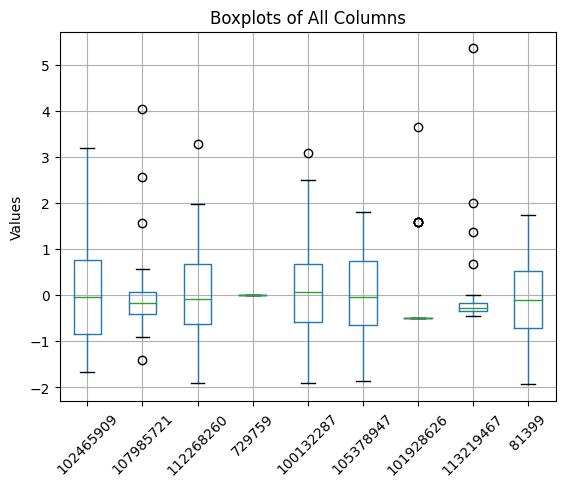

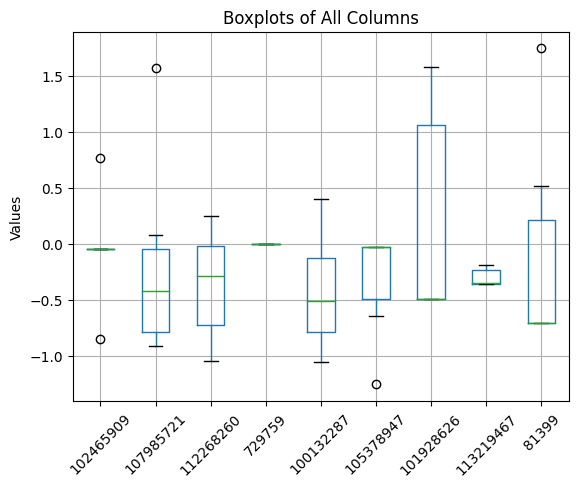

In [ ]:
# 11-20
df_edited.iloc[:, 11:20].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 11:20].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

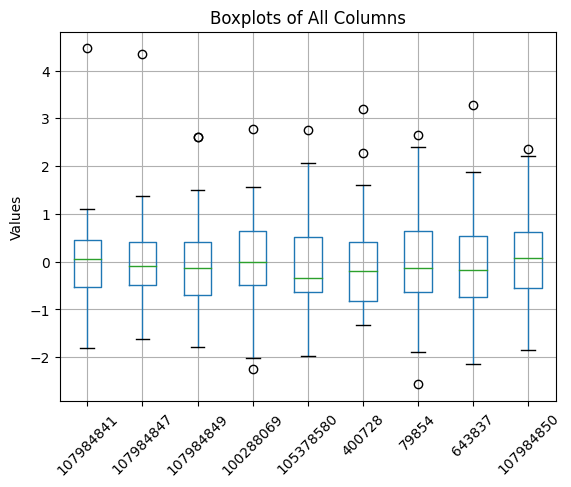

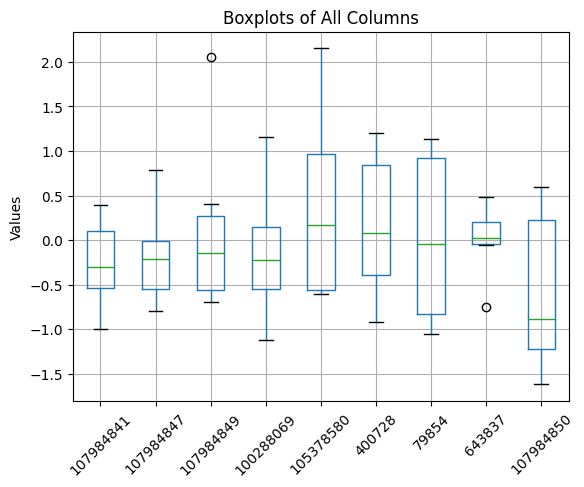

In [ ]:
# 21-30
df_edited.iloc[:, 21:30].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 21:30].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

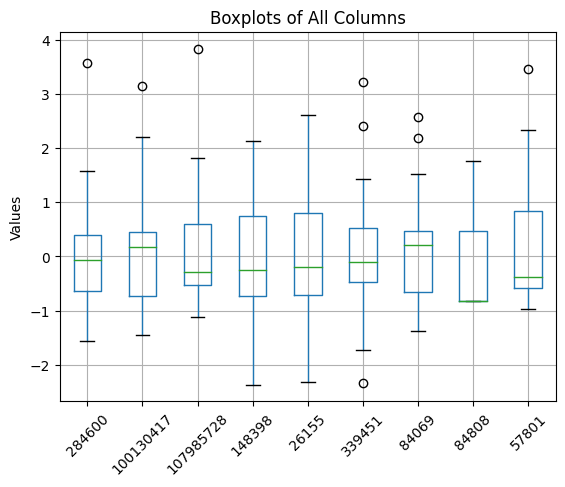

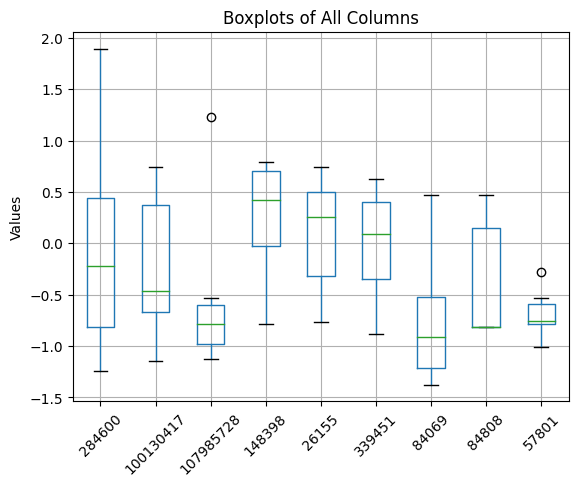

In [ ]:
# 31-40
df_edited.iloc[:, 31:40].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 31:40].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

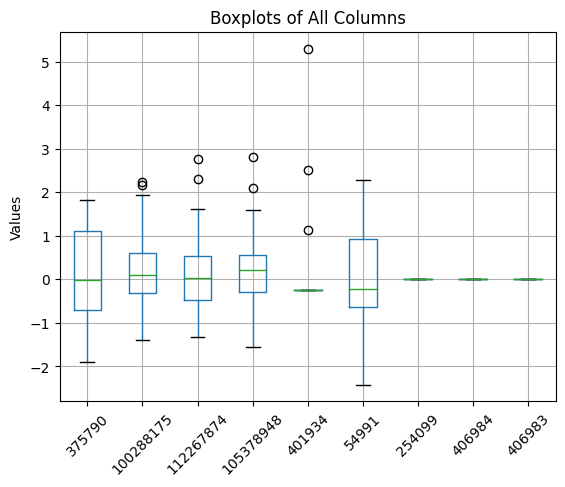

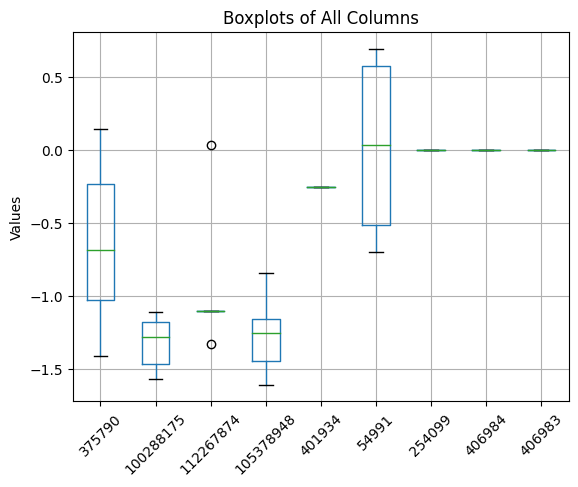

In [ ]:
# 41-50
df_edited.iloc[:, 41:50].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 41:50].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

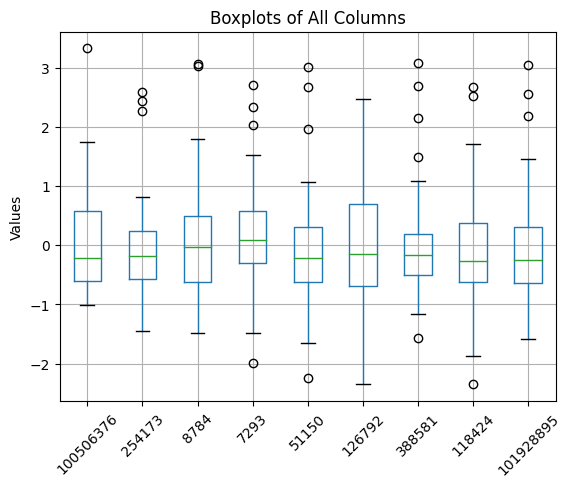

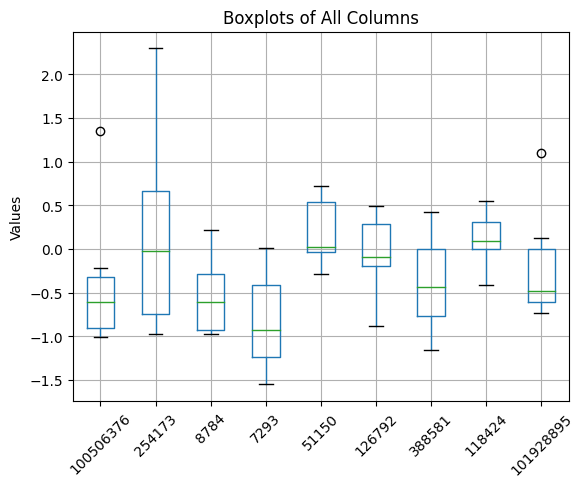

In [ ]:
# 51-60
df_edited.iloc[:, 51:60].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 51:60].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

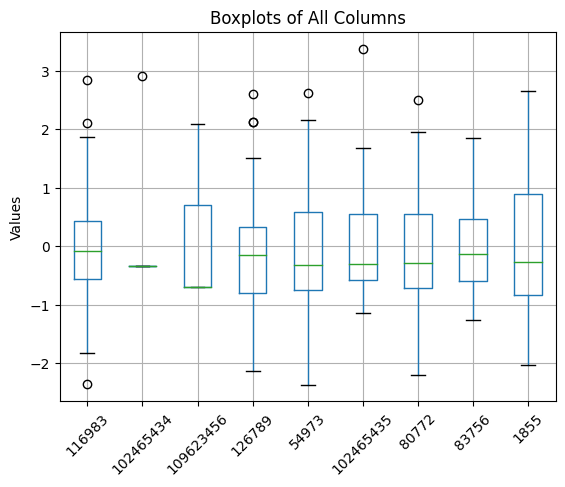

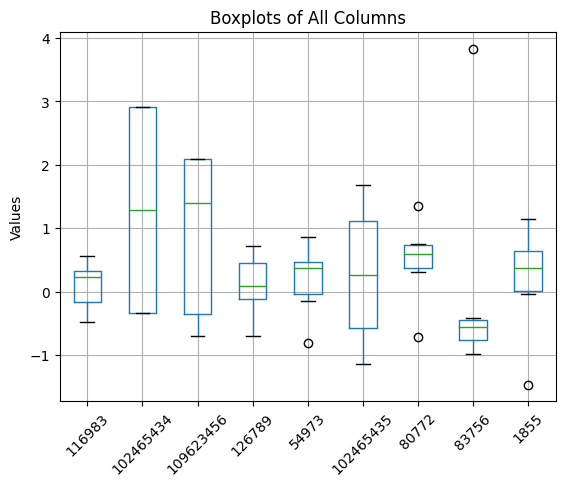

In [ ]:
# 61-70
df_edited.iloc[:, 61:70].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 61:70].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

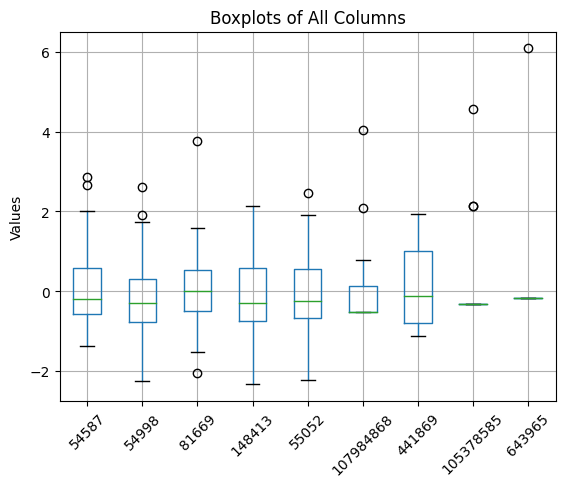

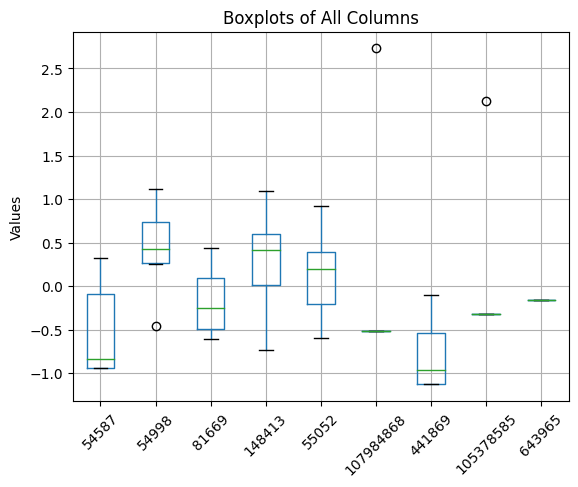

In [ ]:
# 71-80
df_edited.iloc[:, 71:80].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 71:80].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

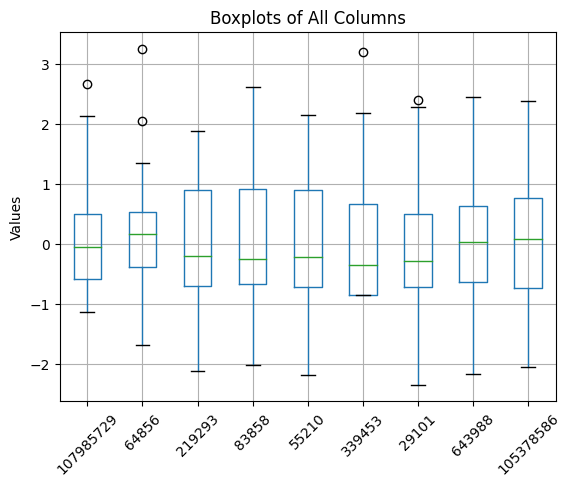

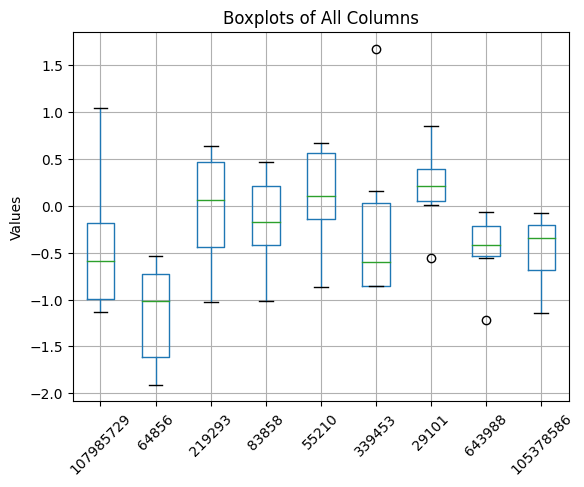

In [ ]:
# 81-90
df_edited.iloc[:, 81:90].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 81:90].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

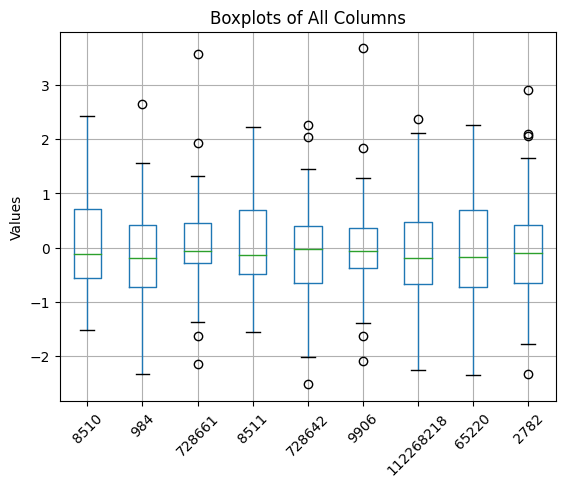

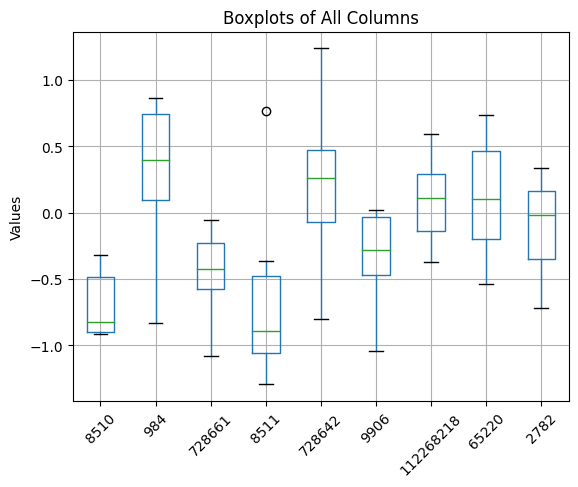

In [ ]:
# 91-100
df_edited.iloc[:, 91:100].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
df_ut.iloc[:, 91:100].boxplot()
plt.title('Boxplots of All Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

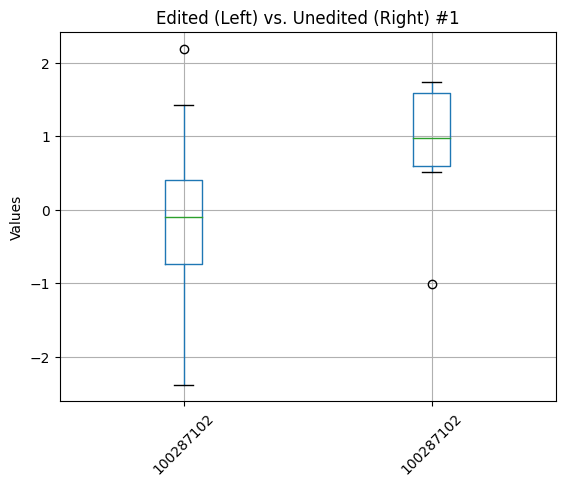

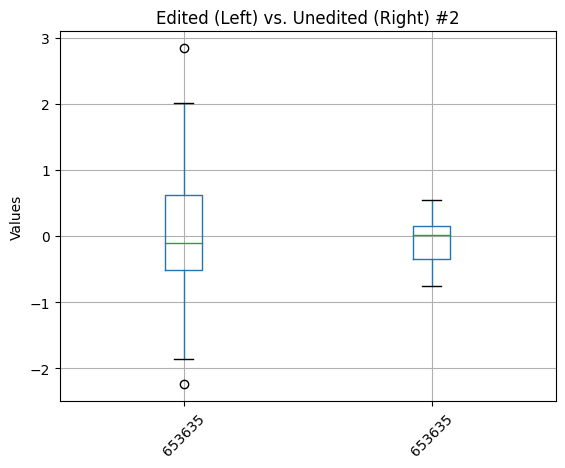

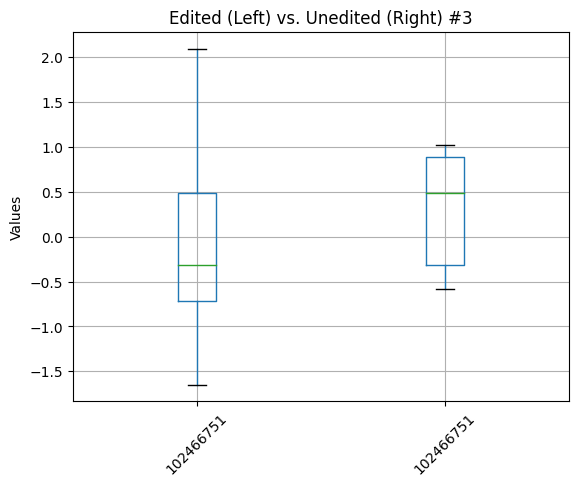

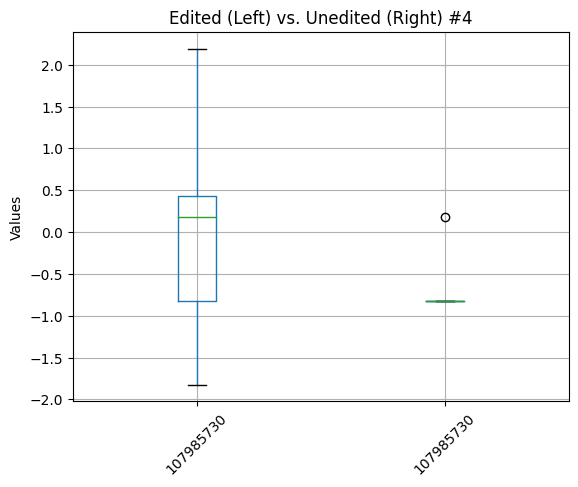

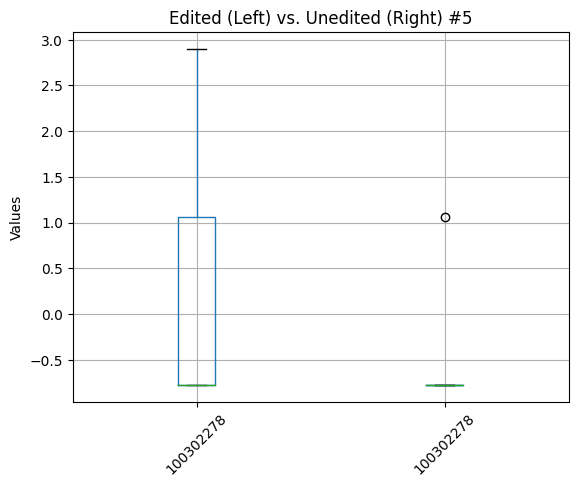

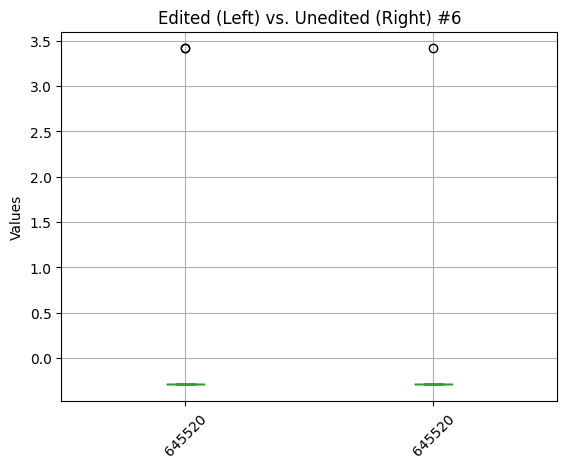

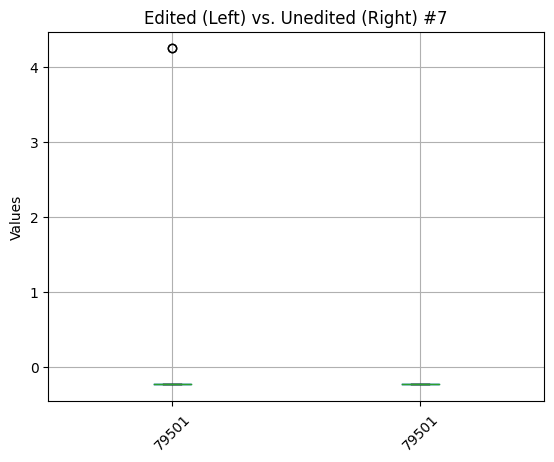

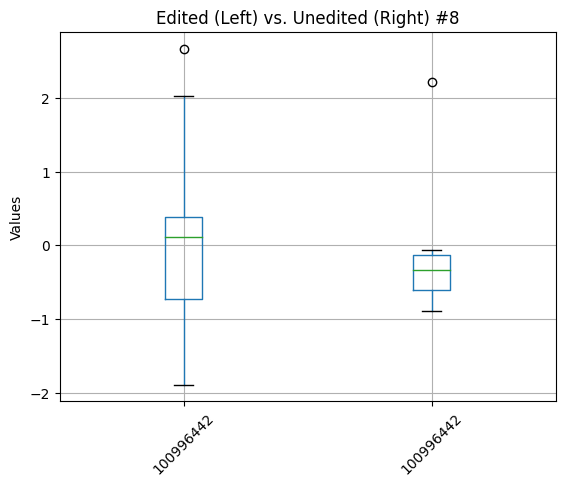

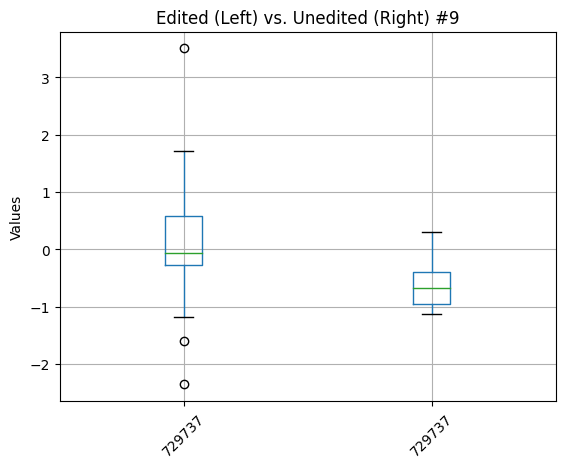

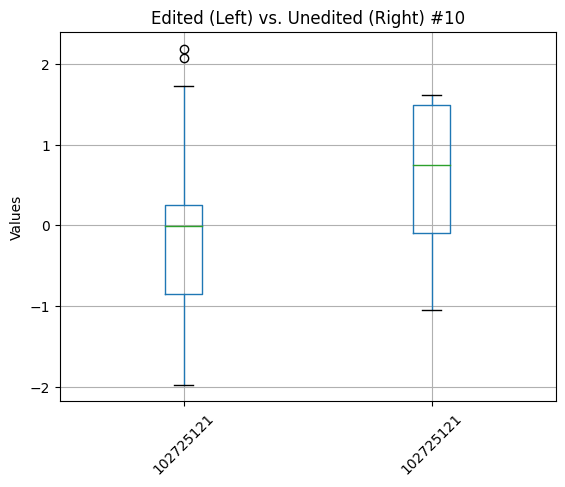

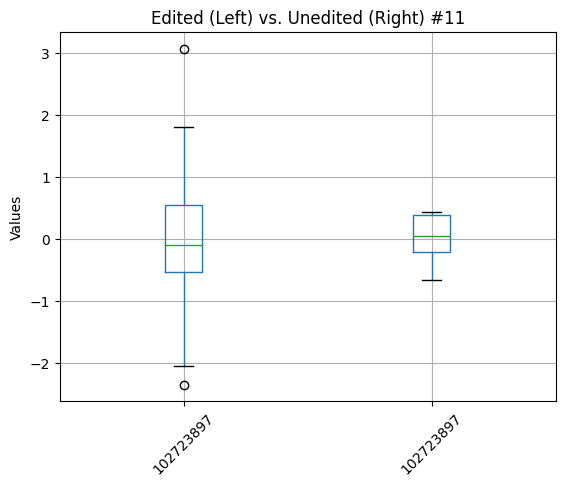

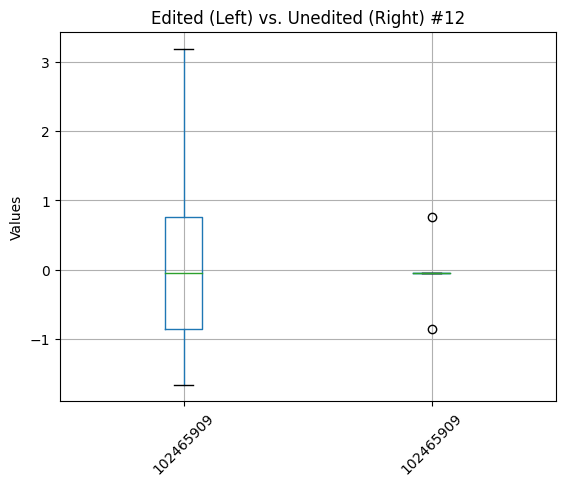

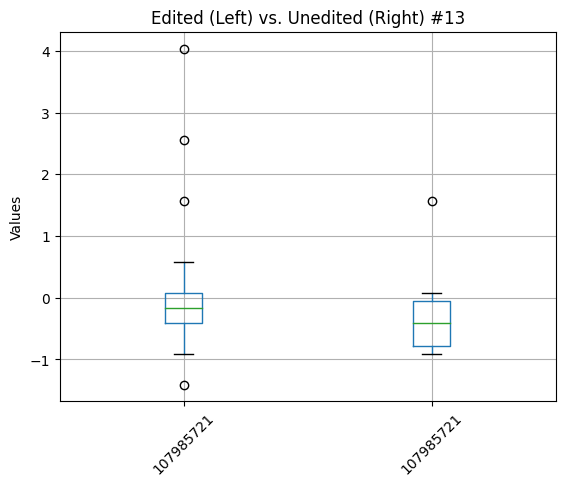

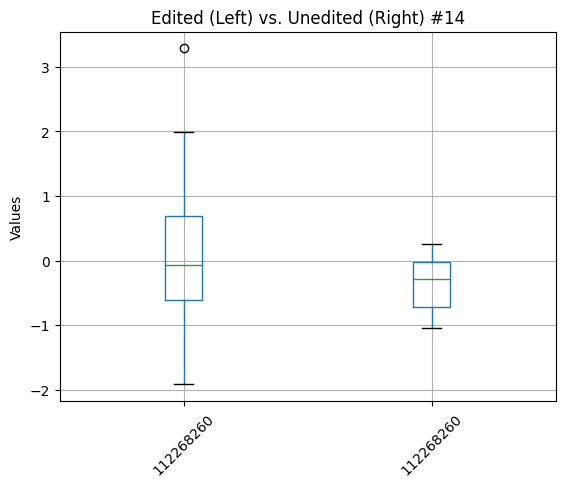

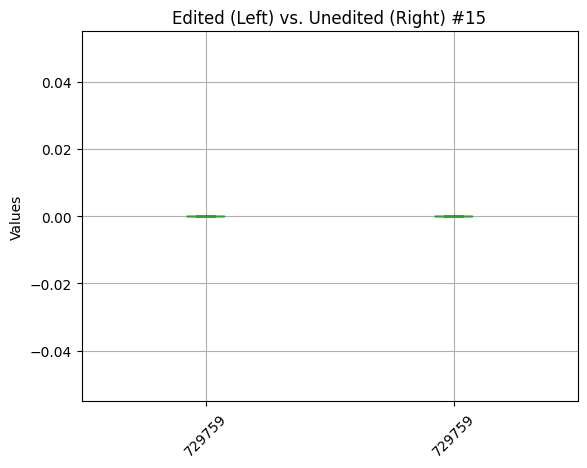

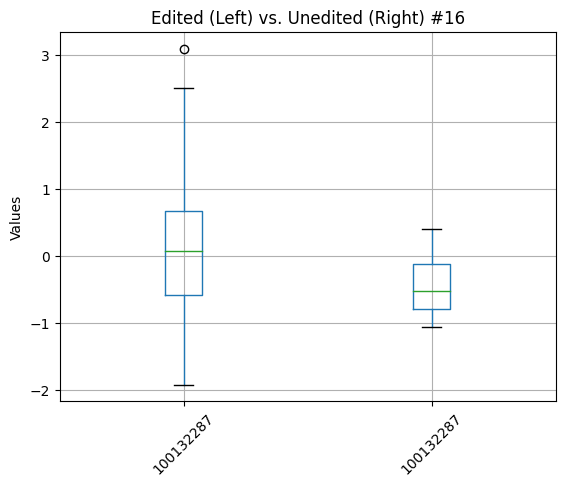

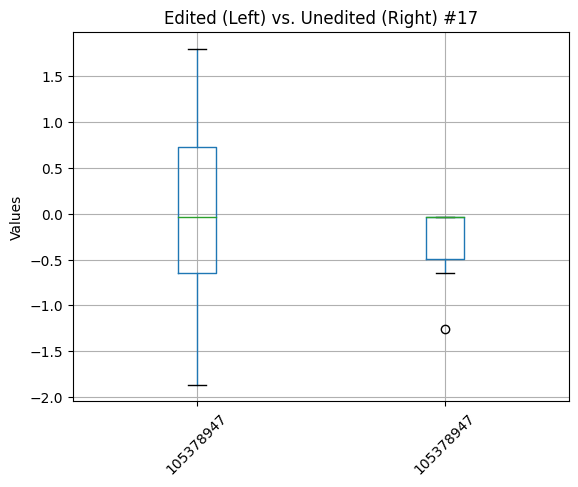

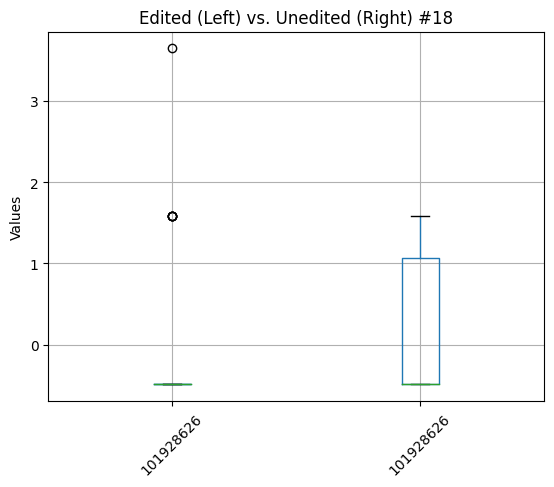

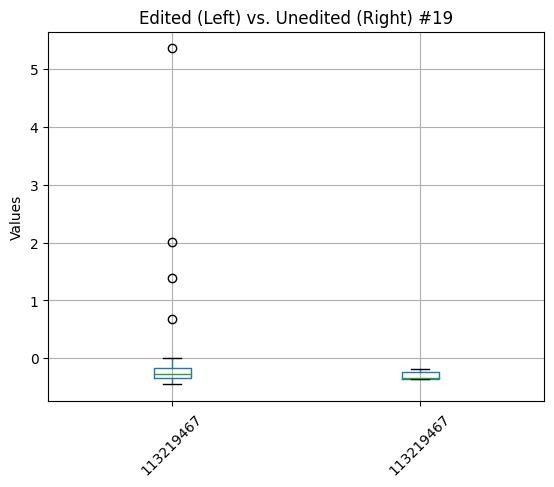

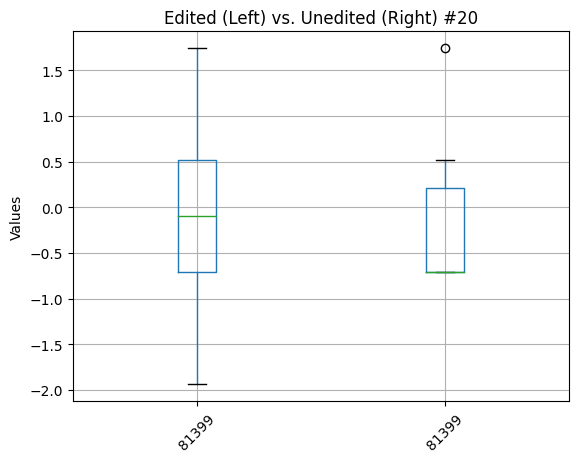

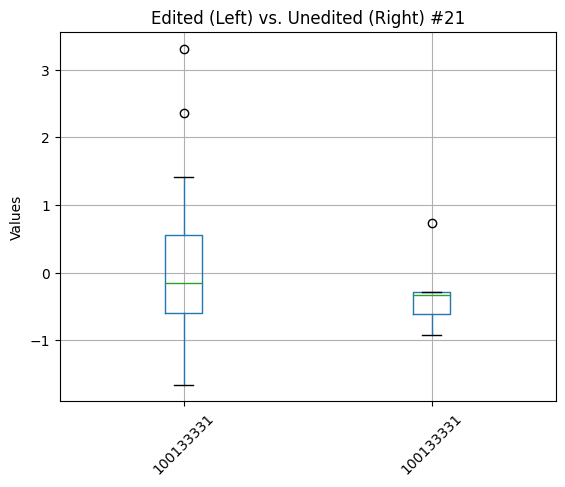

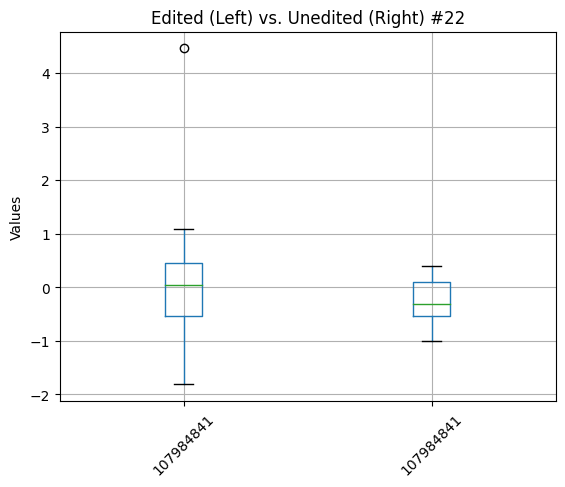

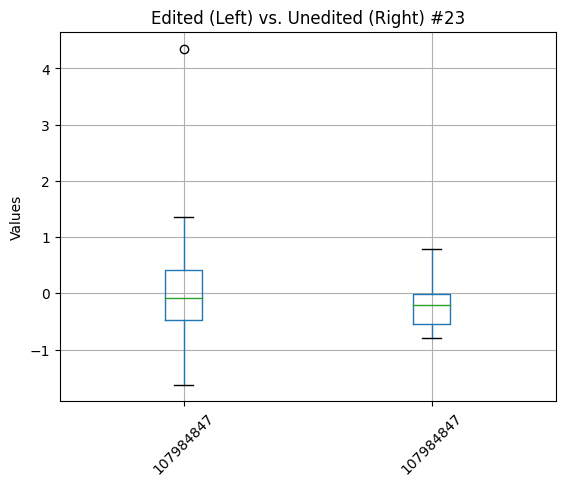

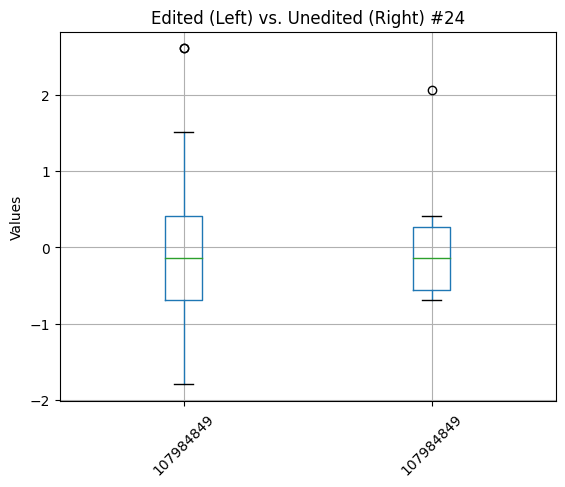

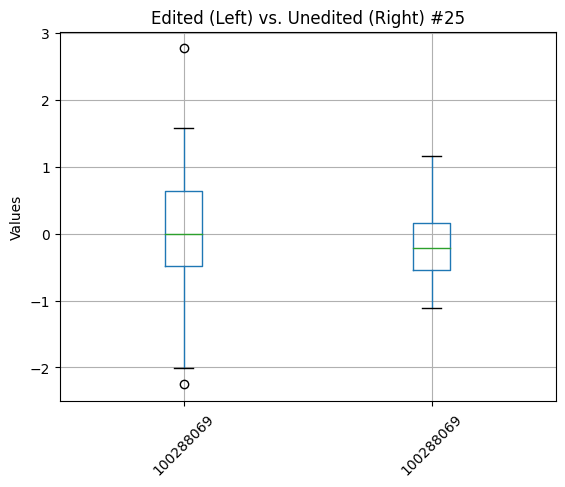

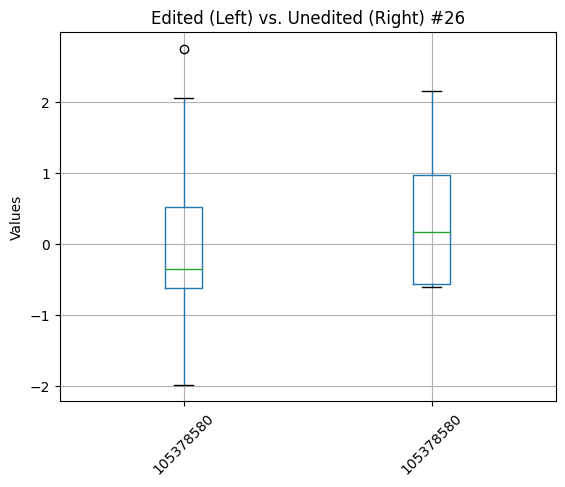

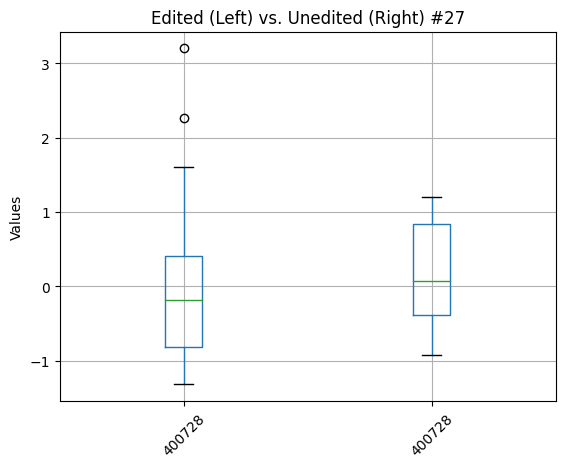

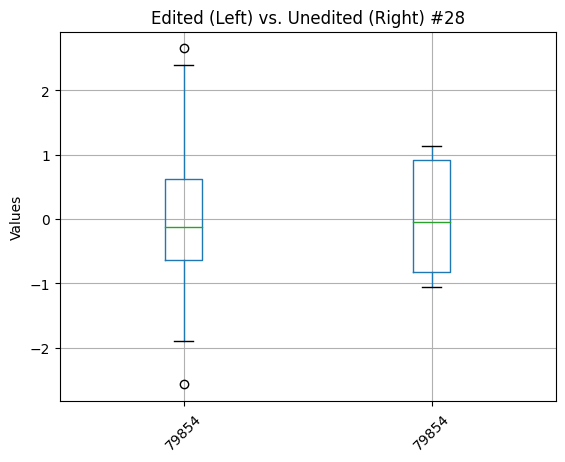

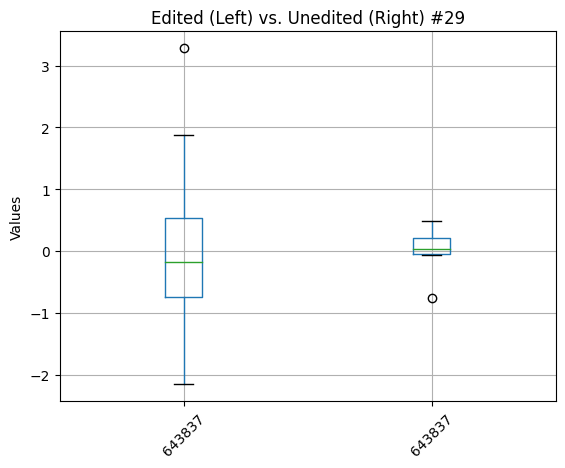

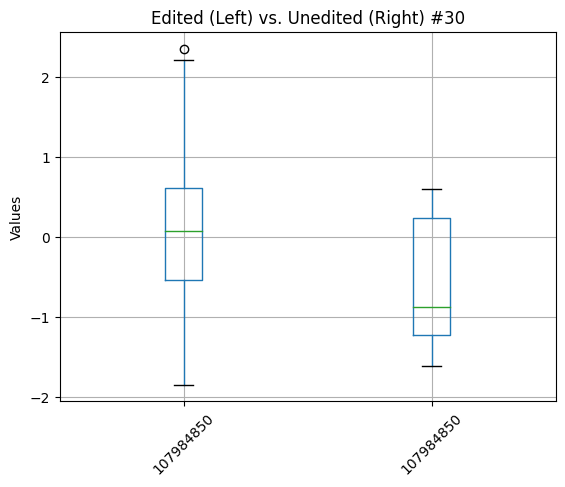

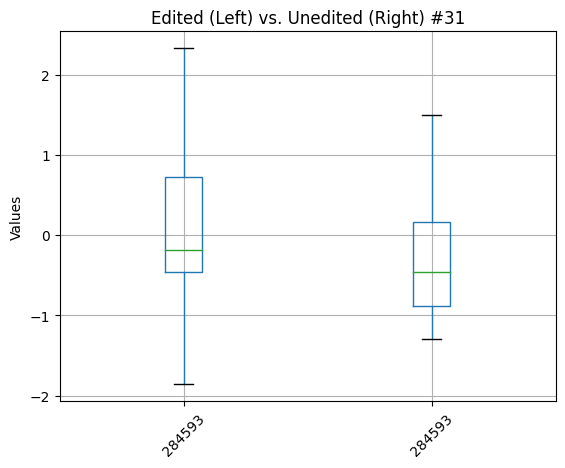

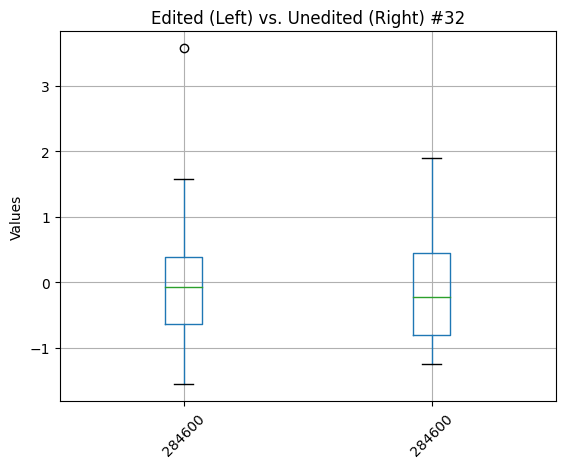

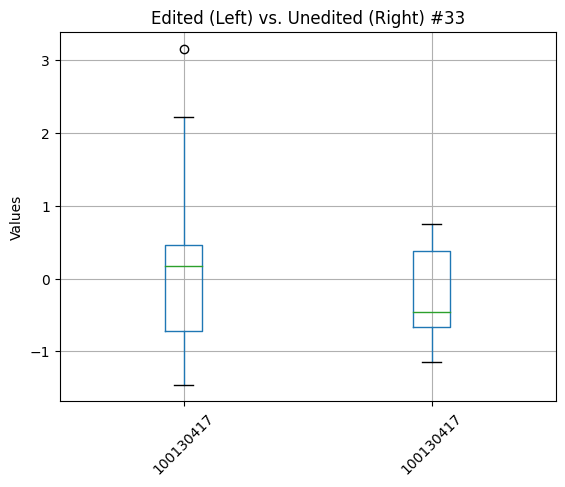

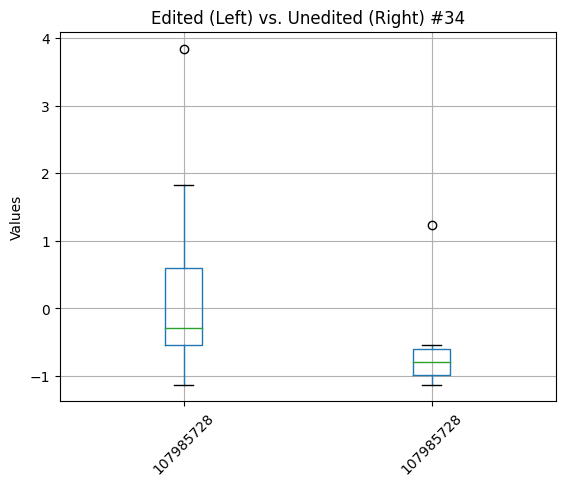

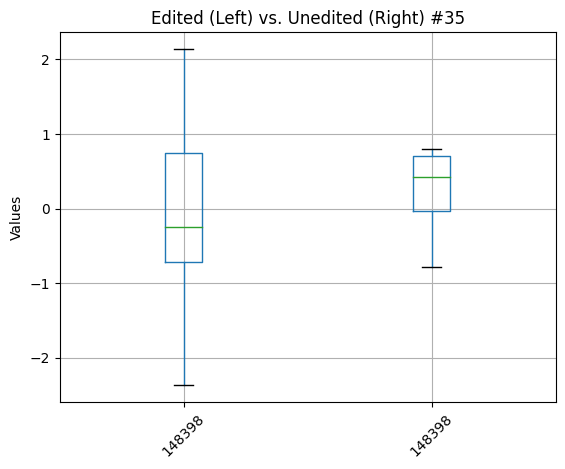

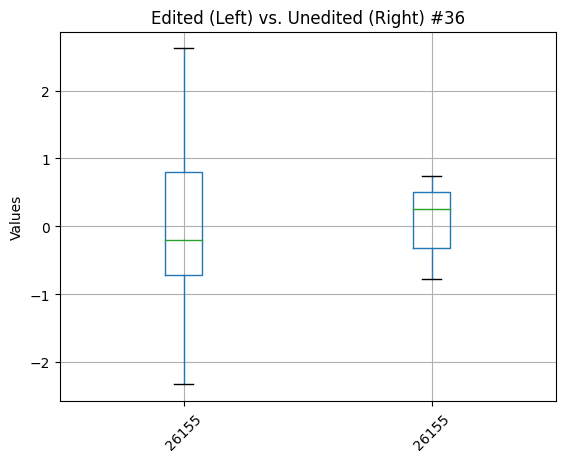

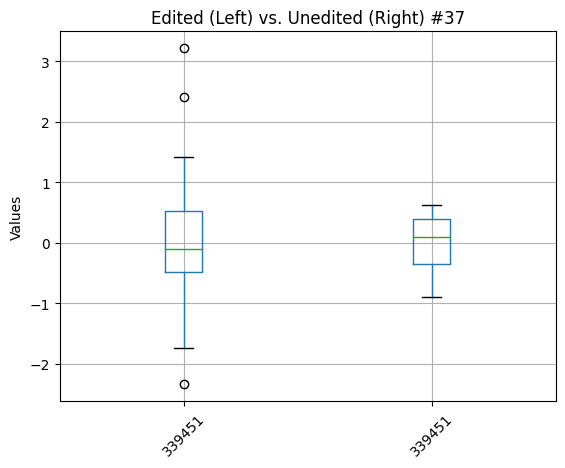

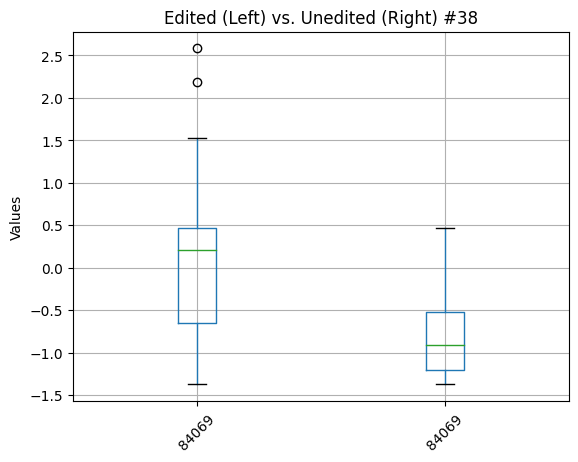

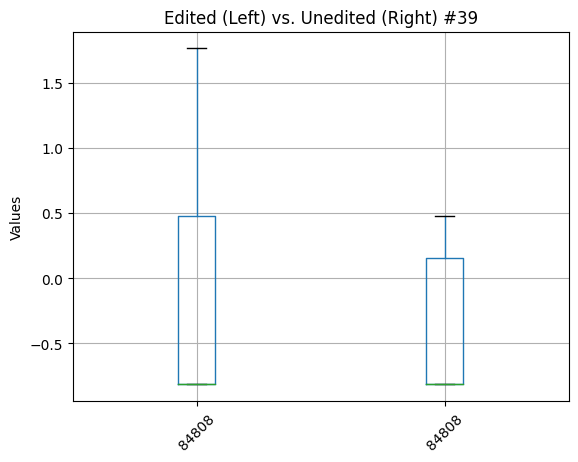

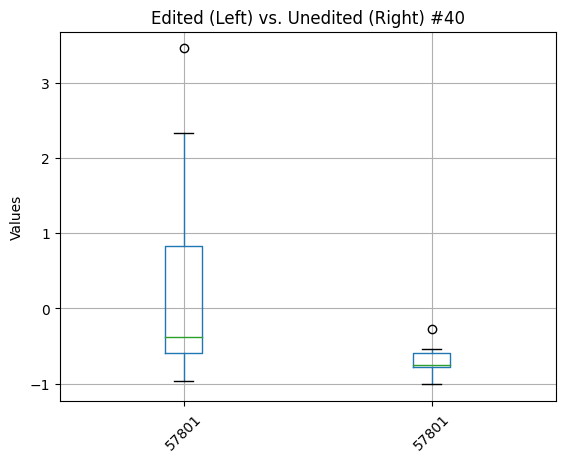

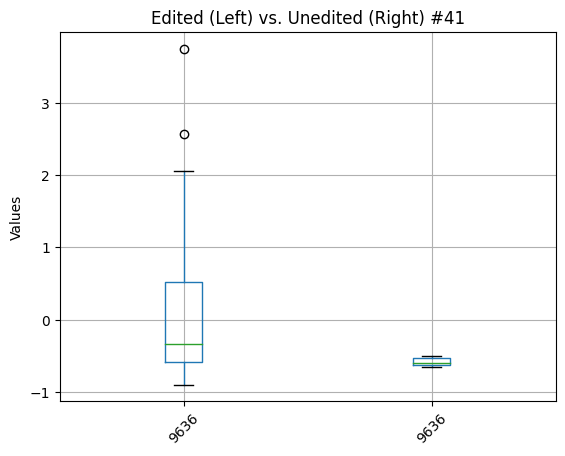

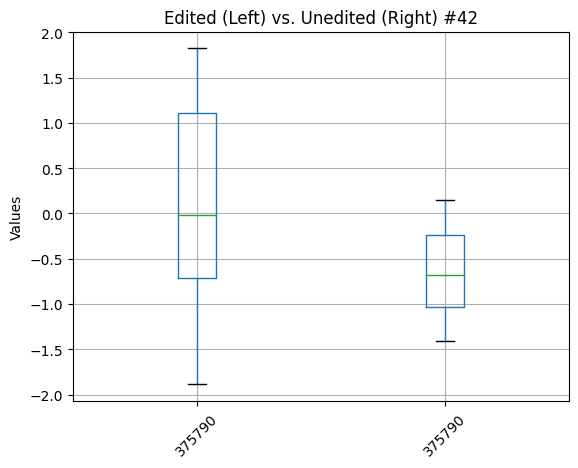

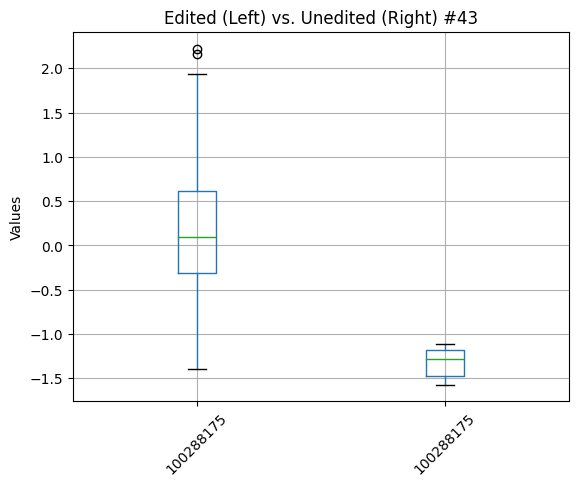

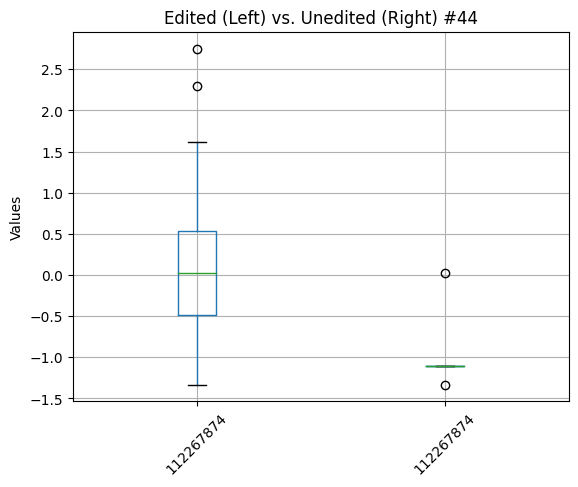

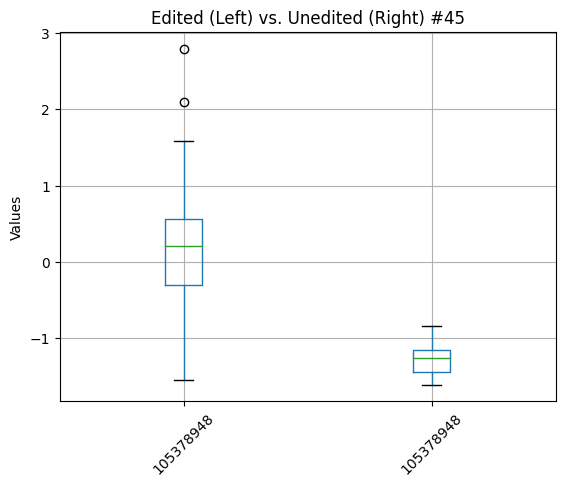

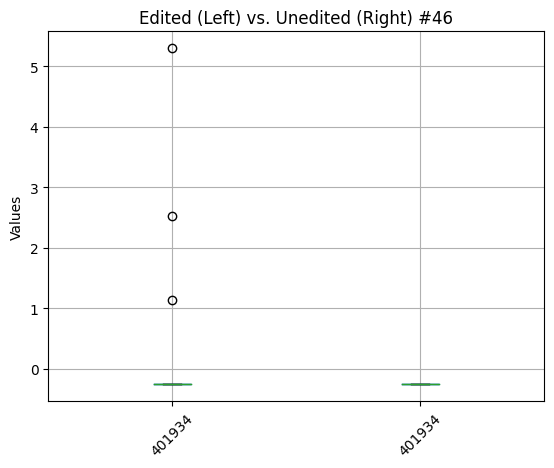

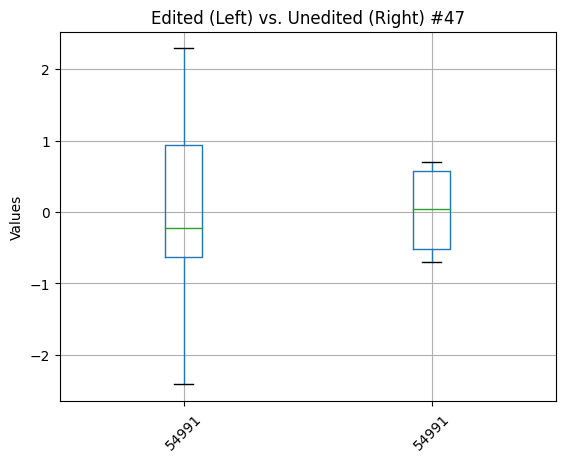

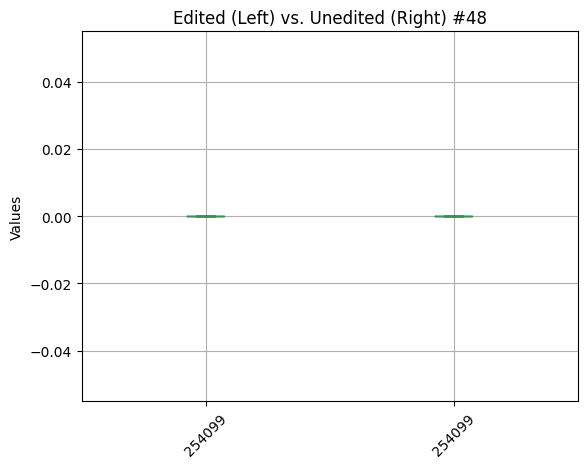

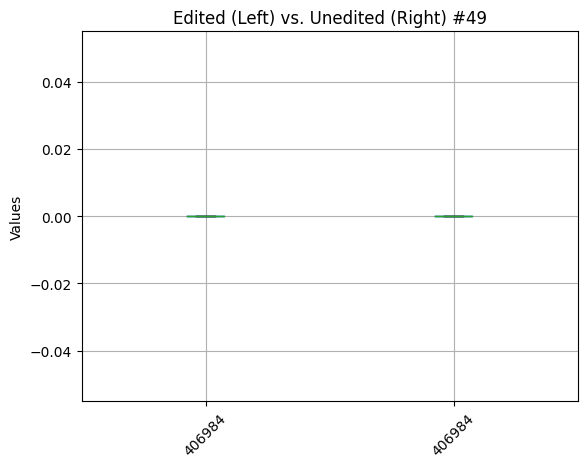

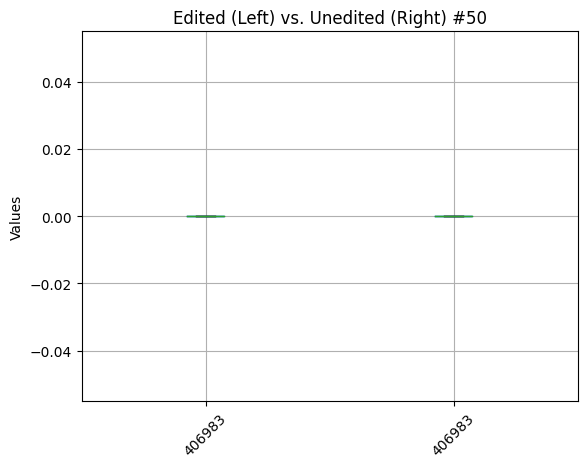

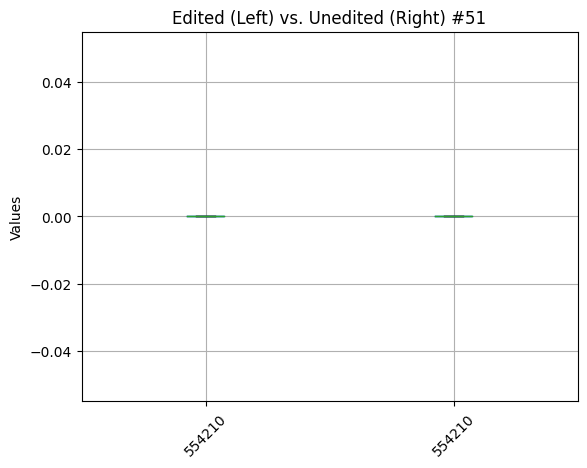

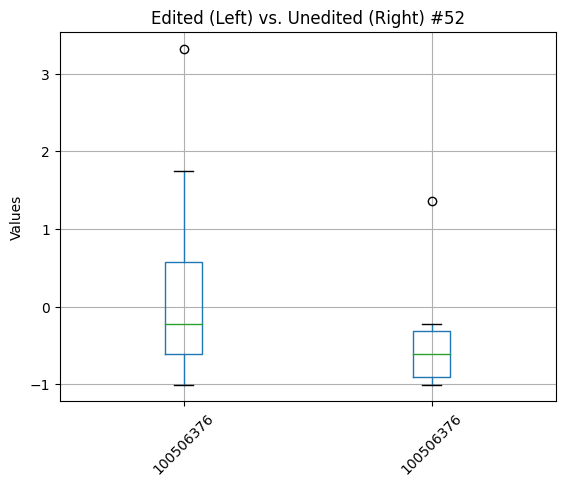

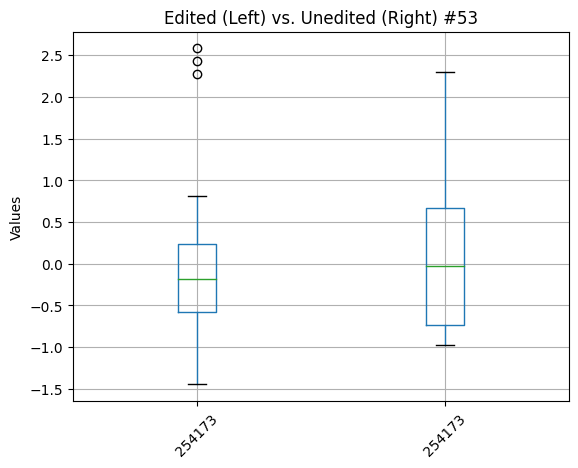

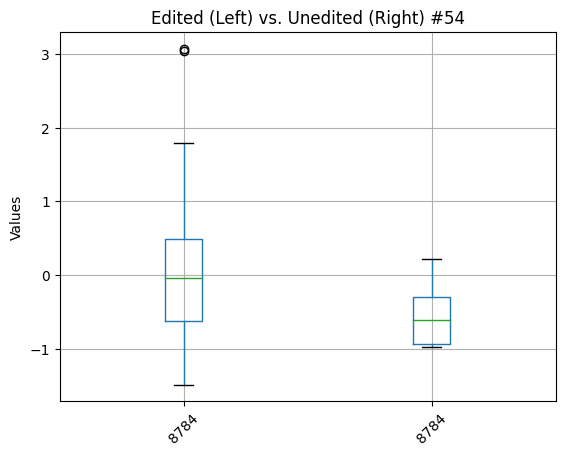

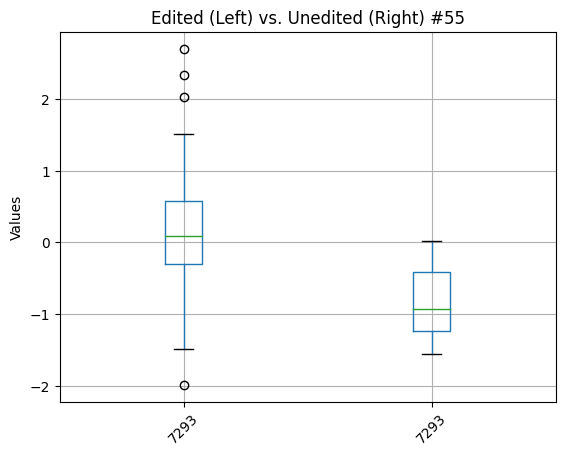

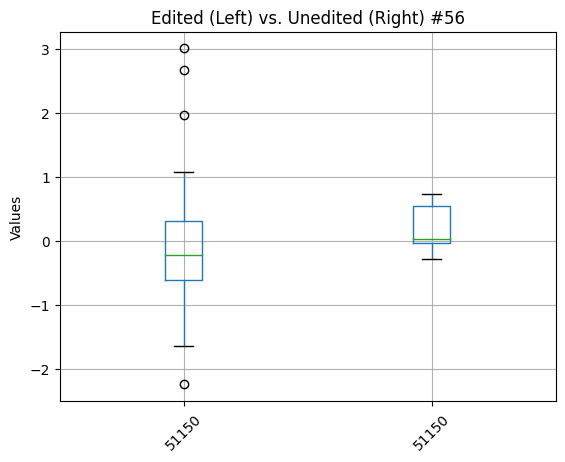

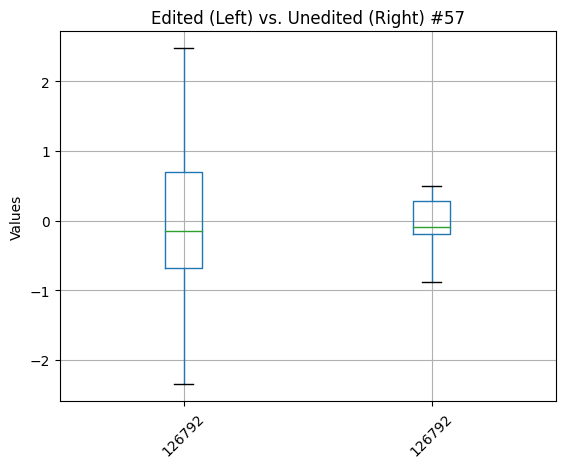

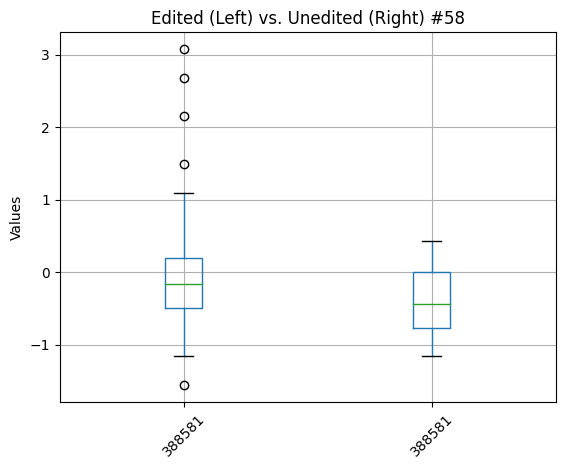

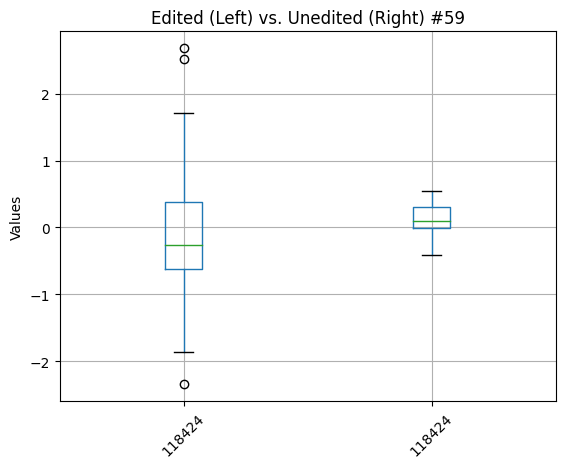

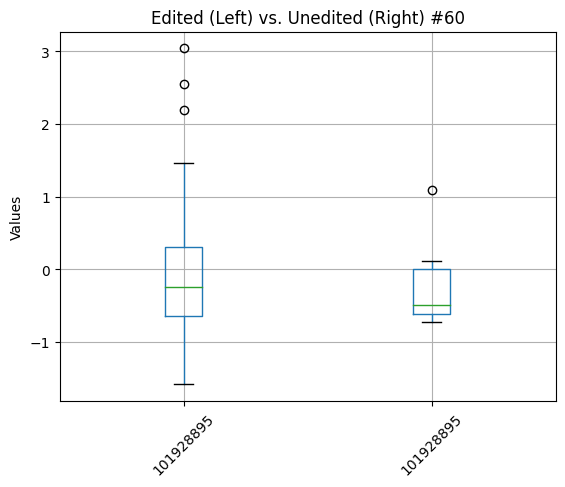

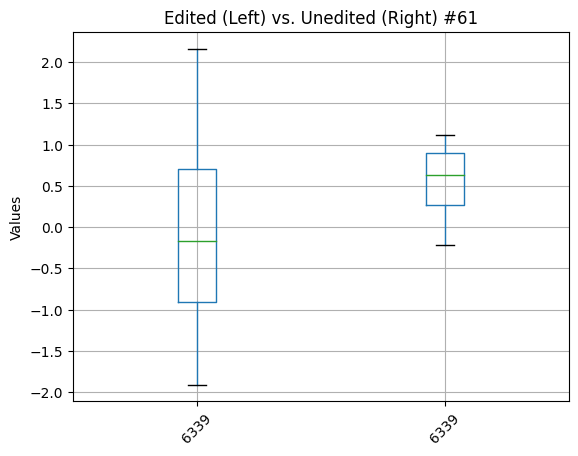

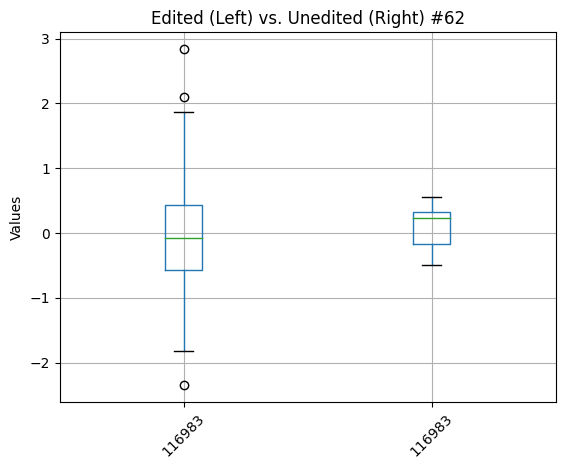

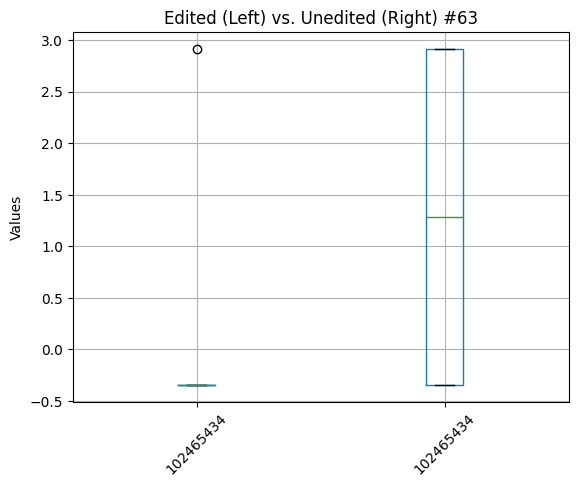

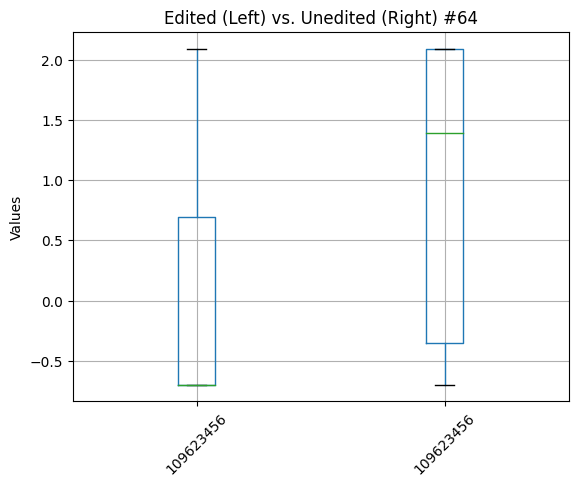

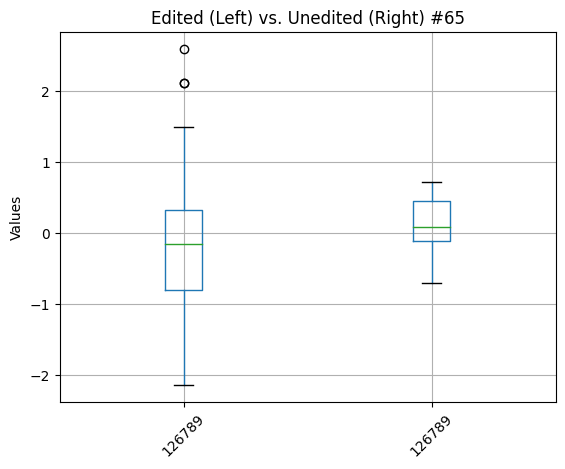

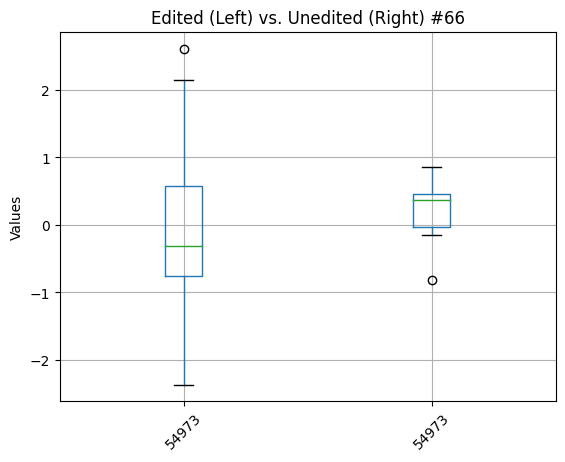

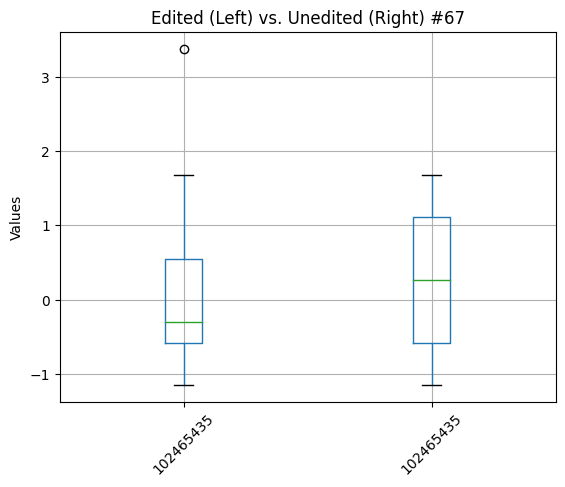

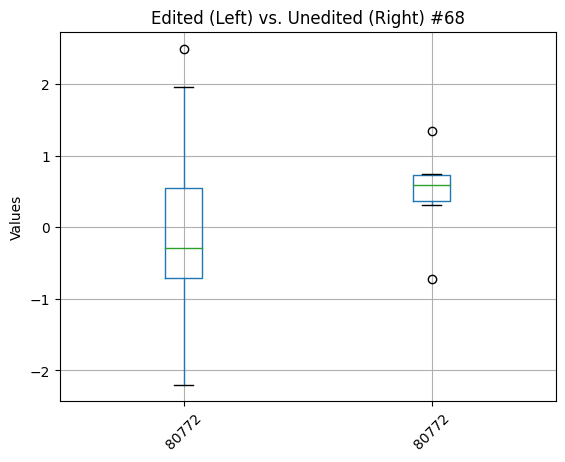

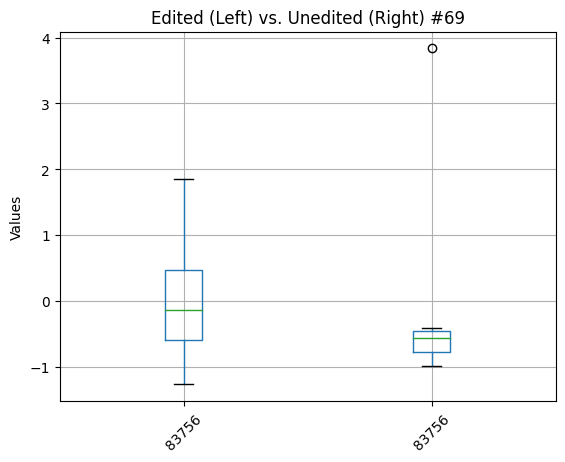

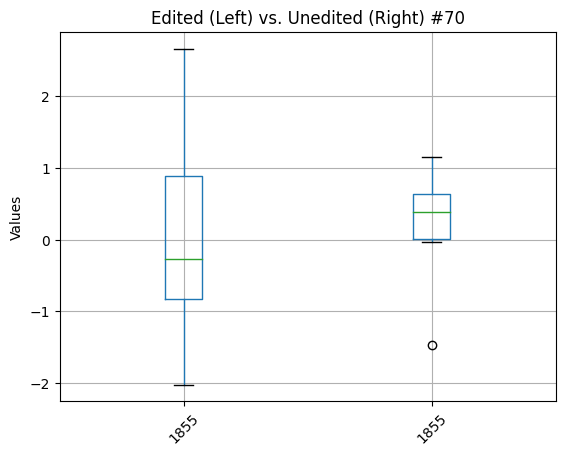

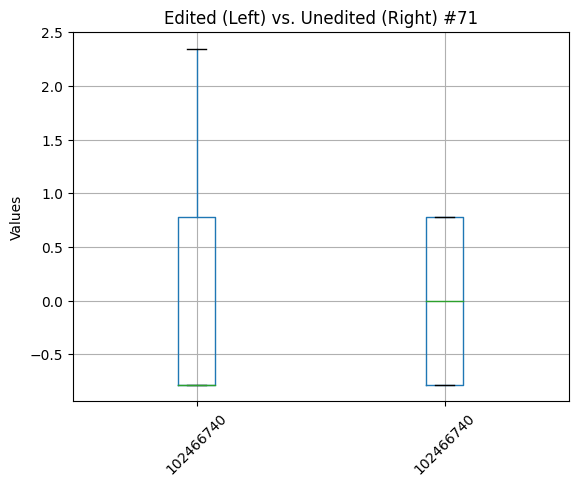

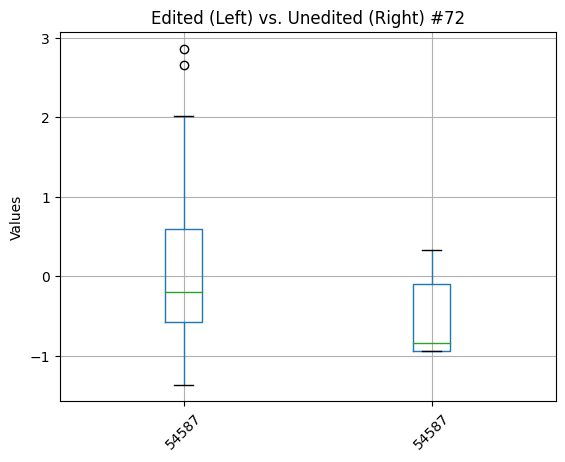

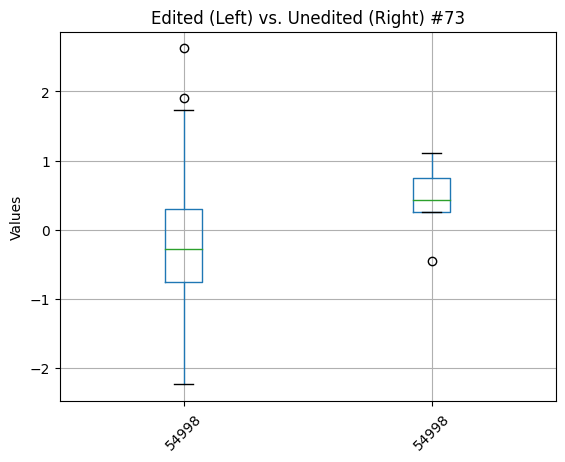

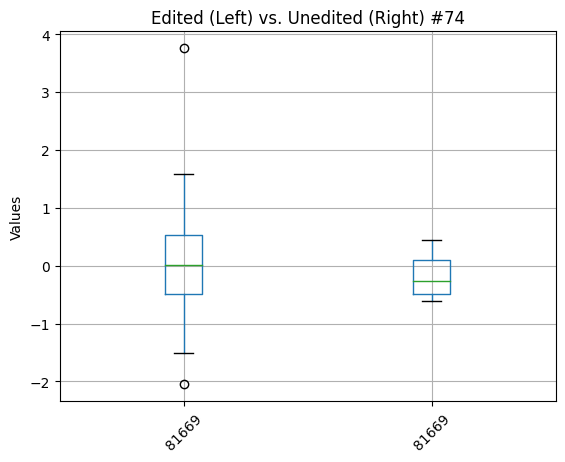

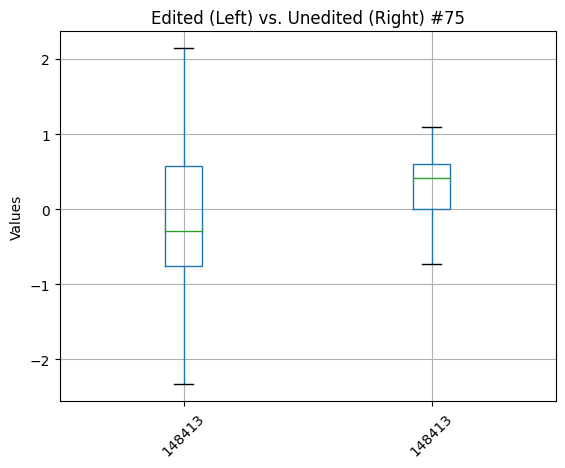

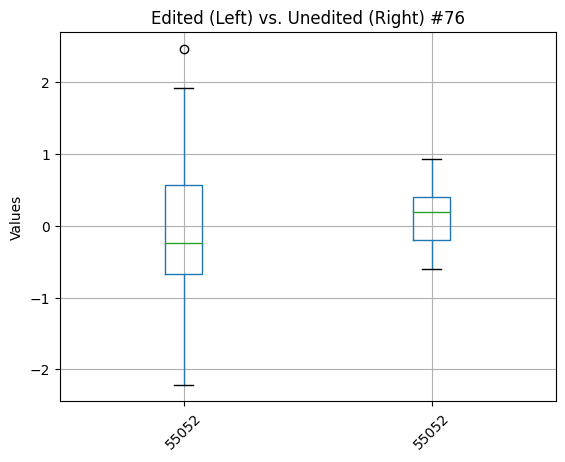

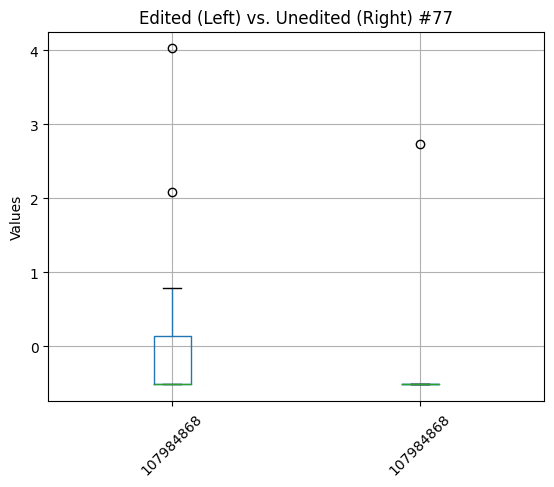

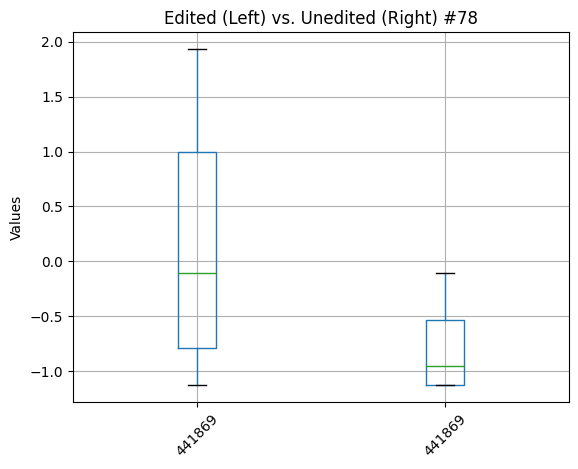

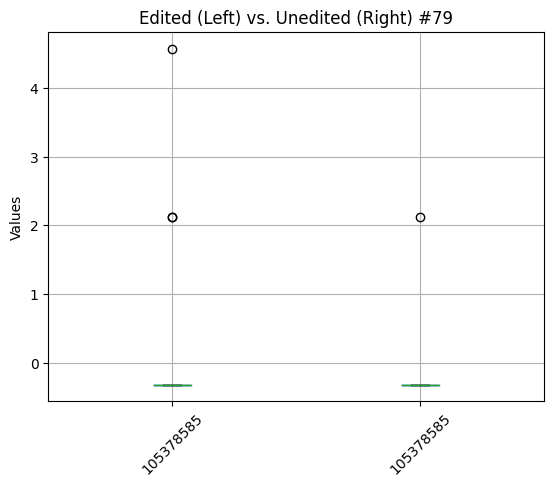

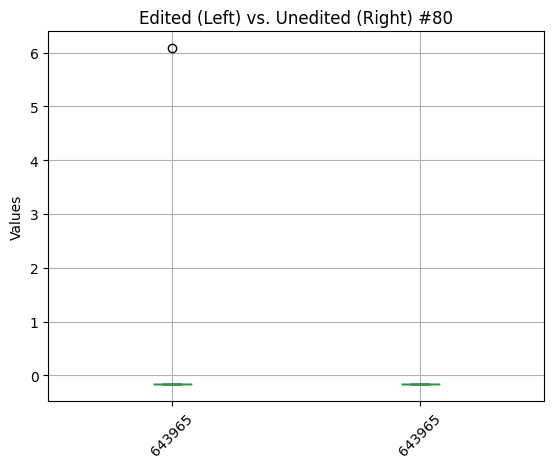

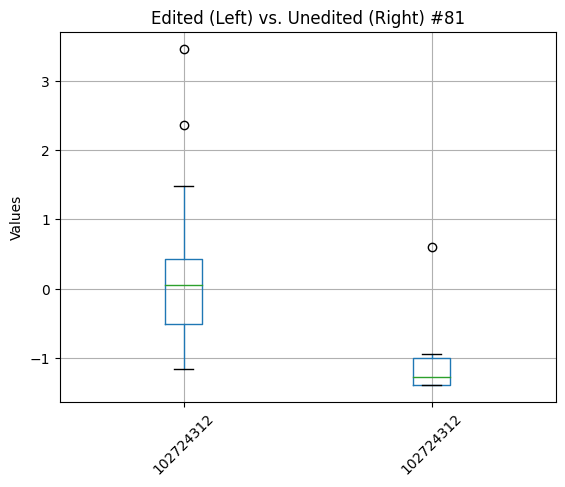

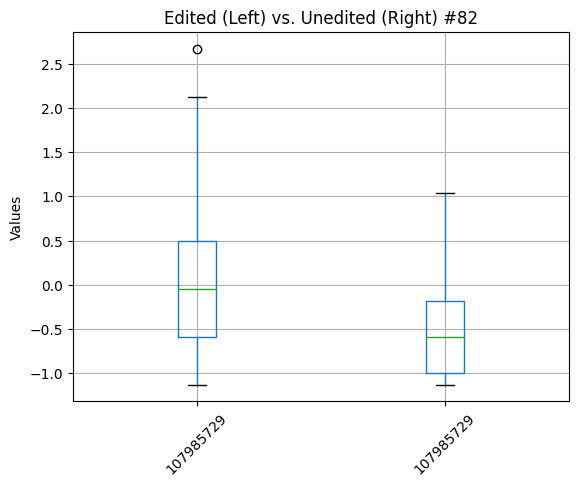

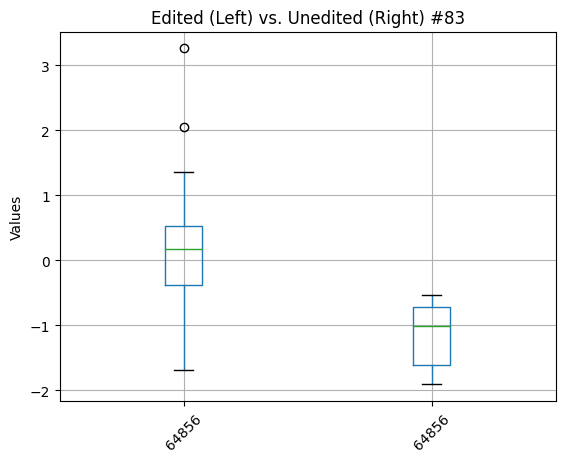

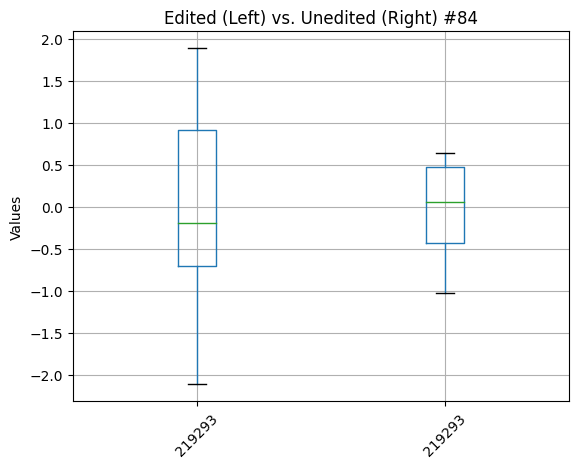

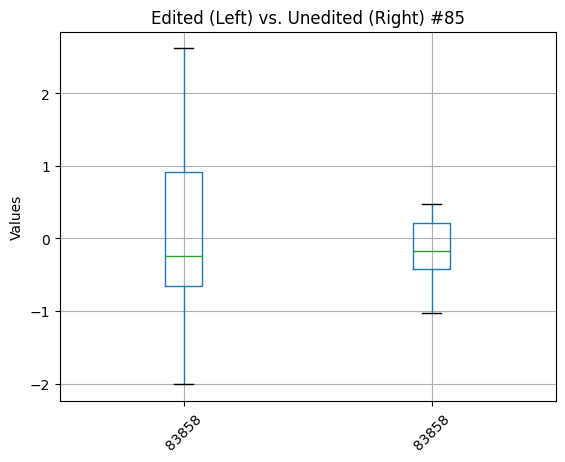

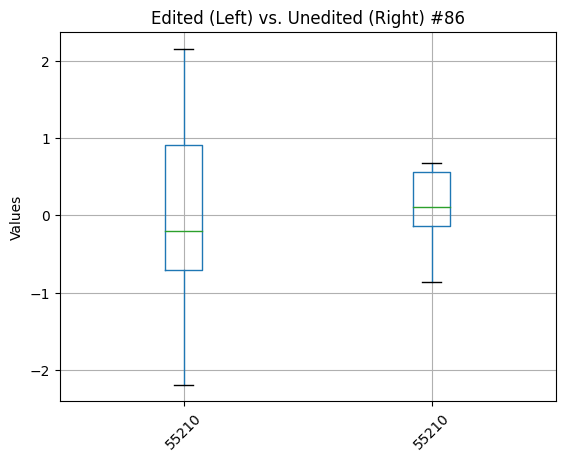

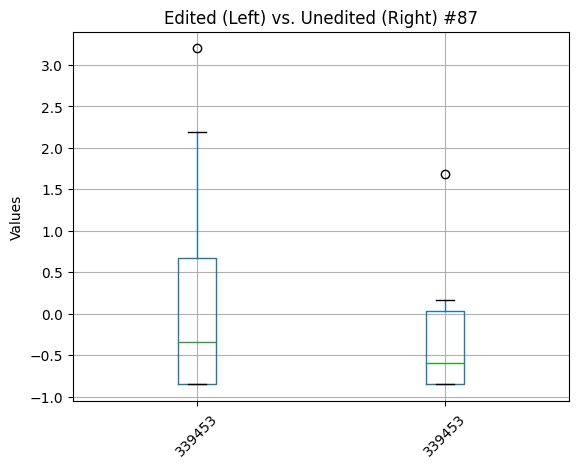

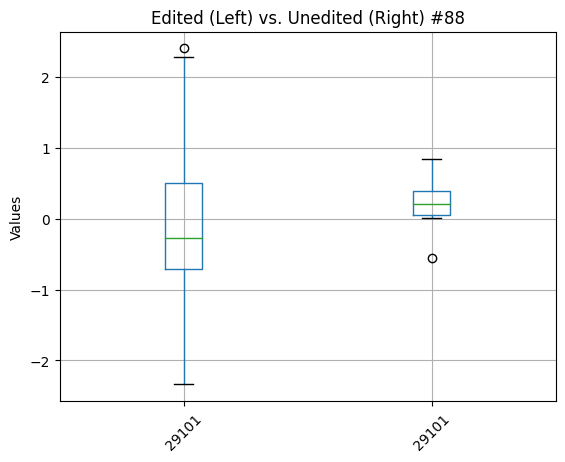

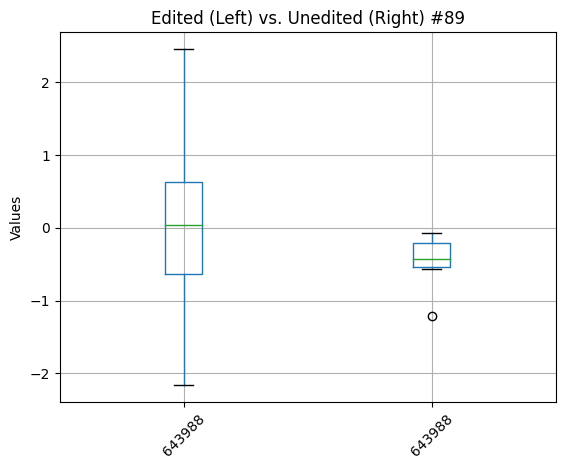

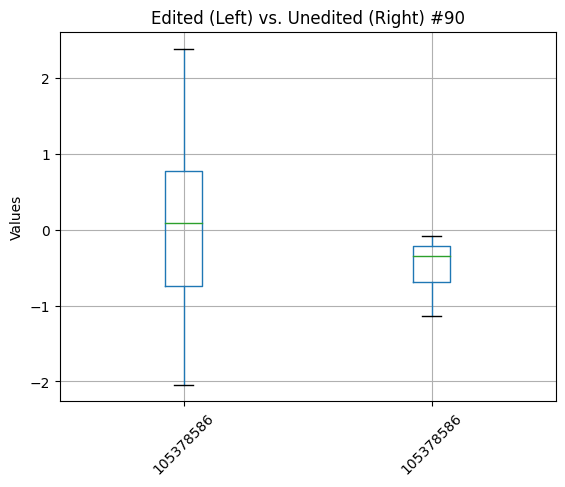

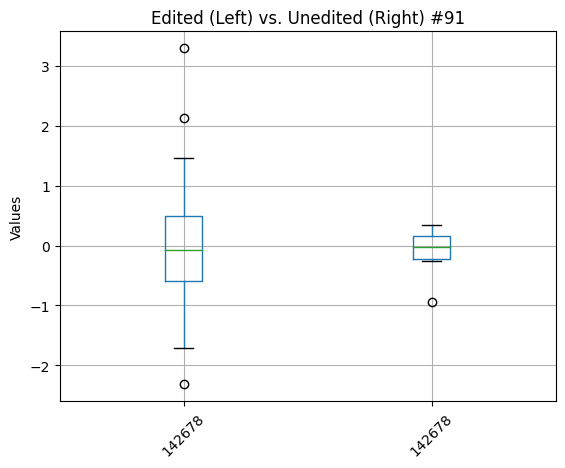

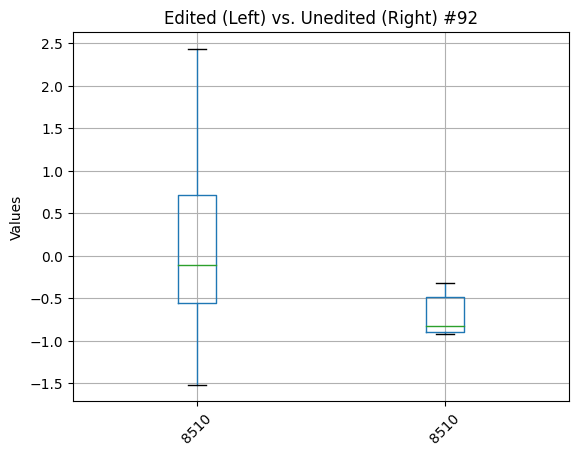

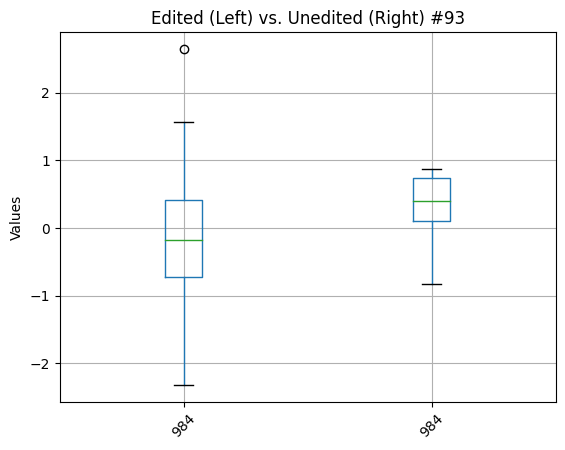

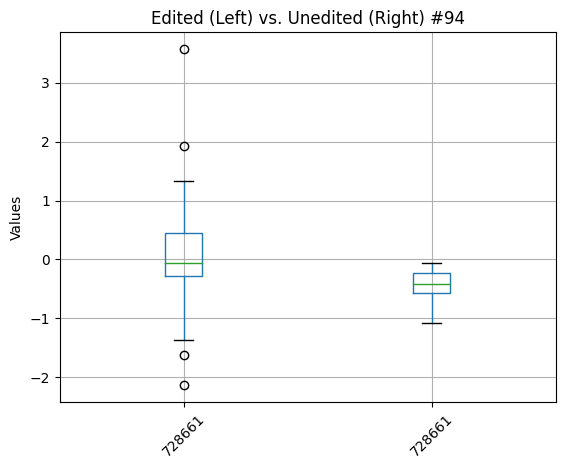

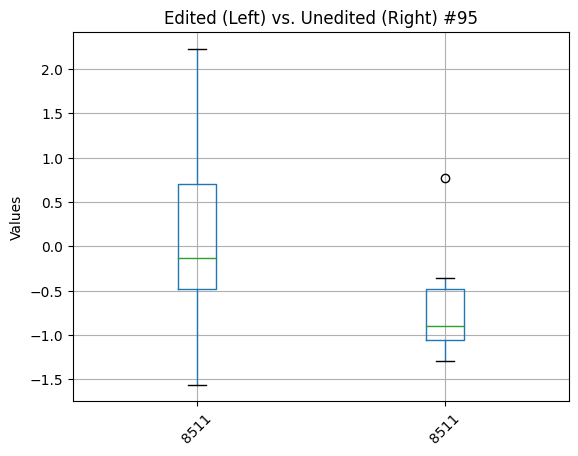

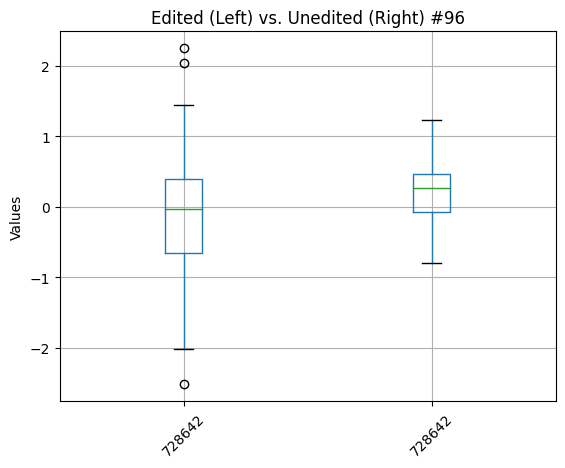

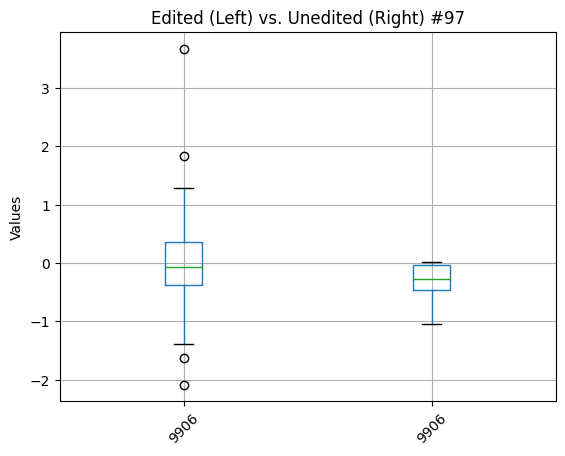

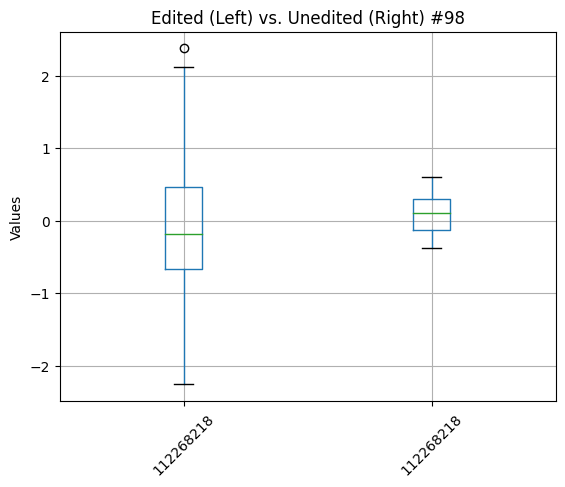

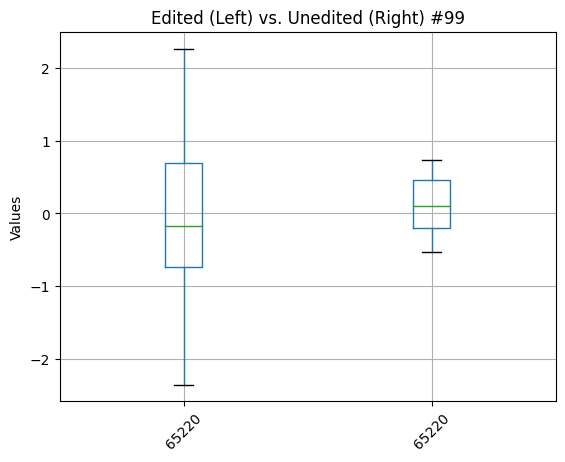

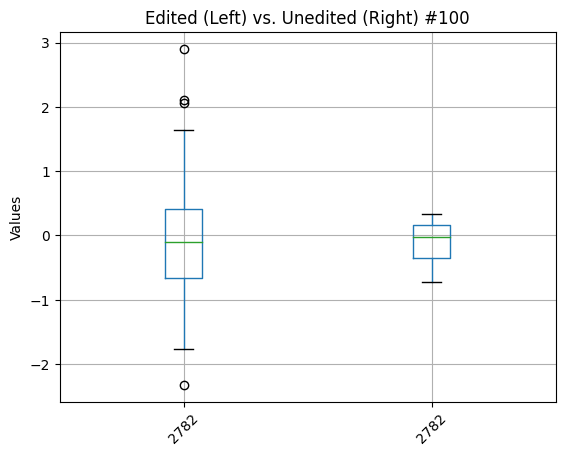

In [ ]:

for i in range(100):
  combined_df = pd.concat([df_edited.iloc[:, i:i+1], df_ut.iloc[:, i:i+1]], axis=1)

  # Create side-by-side boxplots
  combined_df.boxplot()
  plt.title('Edited (Left) vs. Unedited (Right) #' + str(i+1))
  plt.ylabel('Values')
  plt.xticks(rotation=45)  # Rotate x labels for better visibility
  plt.show()

**Plots that looked most interesting:**




**4**

**5**

**12**

**18**

**29**

**34**

**38**

**41**

**43**

**44**

**45**

**55**

**63**

**64**

**68**

**77**

**78**

**81**






